In [59]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import Adam,RMSprop,SGD
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1671)

In [61]:
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = Sequential()
		# CONV => RELU => POOL
		model.add(Conv2D(20, kernel_size=5, padding="same",
			input_shape=input_shape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
		# CONV => RELU => POOL
		model.add(Conv2D(50, kernel_size=5, padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
		# Flatten => RELU layers
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
 
		# a softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		return model

In [68]:
NB_EPOCH = 3
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28
NB_CLASSES = 10
INPUT_SHAPE = (IMG_ROWS, IMG_COLS,1)

In [69]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
K.set_image_dim_ordering("tf")
X_train = X_train.astype('float32')
X_train = X_train/255
X_test = X_test.astype('float32')
X_test = X_test/255

In [70]:
X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [71]:
y_train = np_utils.to_categorical(y_train,NB_CLASSES)
y_test = np_utils.to_categorical(y_test,NB_CLASSES)

In [72]:
model = LeNet.build(input_shape=INPUT_SHAPE,classes=NB_CLASSES)
model.compile(optimizer=OPTIMIZER,loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test,y_test,verbose=VERBOSE)
print("Test Score:",score[0])
print("Test Acccuracy:",score[1])
print(history.history.keys())

Train on 48000 samples, validate on 12000 samples
Epoch 1/3


  128/48000 [..............................] - ETA: 12:01 - loss: 2.3031 - acc: 0.1172

  256/48000 [..............................] - ETA: 8:49 - loss: 2.6587 - acc: 0.1133 

  384/48000 [..............................] - ETA: 7:41 - loss: 2.5396 - acc: 0.1953

  512/48000 [..............................] - ETA: 7:08 - loss: 2.3752 - acc: 0.2988

  640/48000 [..............................] - ETA: 6:52 - loss: 2.2276 - acc: 0.3563

  768/48000 [..............................] - ETA: 6:37 - loss: 2.1332 - acc: 0.3867

  896/48000 [..............................] - ETA: 6:27 - loss: 2.0275 - acc: 0.4286

 1024/48000 [..............................] - ETA: 6:19 - loss: 1.9170 - acc: 0.4678

 1152/48000 [..............................] - ETA: 6:13 - loss: 1.8267 - acc: 0.4965

 1280/48000 [..............................] - ETA: 6:08 - loss: 1.7271 - acc: 0.5219

 1408/48000 [..............................] - ETA: 6:03 - loss: 1.6311 - acc: 0.5490

 1536/48000 [..............................] - ETA: 6:00 - loss: 1.5293 - acc: 0.5768

 1664/48000 [>.............................] - ETA: 5:56 - loss: 1.4463 - acc: 0.5962

 1792/48000 [>.............................] - ETA: 5:53 - loss: 1.3796 - acc: 0.6144

 1920/48000 [>.............................] - ETA: 5:51 - loss: 1.3192 - acc: 0.6307

 2048/48000 [>.............................] - ETA: 5:49 - loss: 1.2703 - acc: 0.6426

 2176/48000 [>.............................] - ETA: 5:46 - loss: 1.2211 - acc: 0.6540

 2304/48000 [>.............................] - ETA: 5:44 - loss: 1.1700 - acc: 0.6671

 2432/48000 [>.............................] - ETA: 5:42 - loss: 1.1230 - acc: 0.6809

 2560/48000 [>.............................] - ETA: 5:40 - loss: 1.0917 - acc: 0.6887

 2688/48000 [>.............................] - ETA: 5:39 - loss: 1.0629 - acc: 0.6964

 2816/48000 [>.............................] - ETA: 5:37 - loss: 1.0283 - acc: 0.7067

 2944/48000 [>.............................] - ETA: 5:35 - loss: 0.9970 - acc: 0.7157

 3072/48000 [>.............................] - ETA: 5:33 - loss: 0.9728 - acc: 0.7223

 3200/48000 [=>............................] - ETA: 5:31 - loss: 0.9444 - acc: 0.7294

 3328/48000 [=>............................] - ETA: 5:30 - loss: 0.9186 - acc: 0.7365

 3456/48000 [=>............................] - ETA: 5:28 - loss: 0.8961 - acc: 0.7433

 3584/48000 [=>............................] - ETA: 5:27 - loss: 0.8716 - acc: 0.7500

 3712/48000 [=>............................] - ETA: 5:25 - loss: 0.8490 - acc: 0.7567

 3840/48000 [=>............................] - ETA: 5:24 - loss: 0.8288 - acc: 0.7625

 3968/48000 [=>............................] - ETA: 5:23 - loss: 0.8076 - acc: 0.7686

 4096/48000 [=>............................] - ETA: 5:21 - loss: 0.7896 - acc: 0.7747

 4224/48000 [=>............................] - ETA: 5:20 - loss: 0.7734 - acc: 0.7794

 4352/48000 [=>............................] - ETA: 5:19 - loss: 0.7580 - acc: 0.7833

 4480/48000 [=>............................] - ETA: 5:17 - loss: 0.7429 - acc: 0.7877

 4608/48000 [=>............................] - ETA: 5:16 - loss: 0.7283 - acc: 0.7917

 4736/48000 [=>............................] - ETA: 5:15 - loss: 0.7158 - acc: 0.7954

 4864/48000 [==>...........................] - ETA: 5:14 - loss: 0.7057 - acc: 0.7985

 4992/48000 [==>...........................] - ETA: 5:12 - loss: 0.6917 - acc: 0.8025

 5120/48000 [==>...........................] - ETA: 5:11 - loss: 0.6809 - acc: 0.8051

 5248/48000 [==>...........................] - ETA: 5:10 - loss: 0.6674 - acc: 0.8089

 5376/48000 [==>...........................] - ETA: 5:09 - loss: 0.6597 - acc: 0.8114

 5504/48000 [==>...........................] - ETA: 5:08 - loss: 0.6506 - acc: 0.8140

 5632/48000 [==>...........................] - ETA: 5:07 - loss: 0.6406 - acc: 0.8166

 5760/48000 [==>...........................] - ETA: 5:05 - loss: 0.6319 - acc: 0.8186

 5888/48000 [==>...........................] - ETA: 5:04 - loss: 0.6228 - acc: 0.8210

 6016/48000 [==>...........................] - ETA: 5:03 - loss: 0.6129 - acc: 0.8236

 6144/48000 [==>...........................] - ETA: 5:02 - loss: 0.6047 - acc: 0.8252

 6272/48000 [==>...........................] - ETA: 5:01 - loss: 0.5955 - acc: 0.8280

 6400/48000 [===>..........................] - ETA: 5:00 - loss: 0.5875 - acc: 0.8303

 6528/48000 [===>..........................] - ETA: 4:59 - loss: 0.5785 - acc: 0.8330

 6656/48000 [===>..........................] - ETA: 4:58 - loss: 0.5692 - acc: 0.8358

 6784/48000 [===>..........................] - ETA: 4:57 - loss: 0.5610 - acc: 0.8380

 6912/48000 [===>..........................] - ETA: 4:56 - loss: 0.5539 - acc: 0.8403

 7040/48000 [===>..........................] - ETA: 4:55 - loss: 0.5479 - acc: 0.8426

 7168/48000 [===>..........................] - ETA: 4:54 - loss: 0.5420 - acc: 0.8442

 7296/48000 [===>..........................] - ETA: 4:53 - loss: 0.5339 - acc: 0.8465

 7424/48000 [===>..........................] - ETA: 4:52 - loss: 0.5265 - acc: 0.8486

 7552/48000 [===>..........................] - ETA: 4:51 - loss: 0.5191 - acc: 0.8508

 7680/48000 [===>..........................] - ETA: 4:50 - loss: 0.5127 - acc: 0.8526

 7808/48000 [===>..........................] - ETA: 4:49 - loss: 0.5060 - acc: 0.8545

 7936/48000 [===>..........................] - ETA: 4:48 - loss: 0.4998 - acc: 0.8562

 8064/48000 [====>.........................] - ETA: 4:47 - loss: 0.4934 - acc: 0.8580

 8192/48000 [====>.........................] - ETA: 4:46 - loss: 0.4880 - acc: 0.8596

 8320/48000 [====>.........................] - ETA: 4:45 - loss: 0.4814 - acc: 0.8614

 8448/48000 [====>.........................] - ETA: 4:44 - loss: 0.4754 - acc: 0.8633

 8576/48000 [====>.........................] - ETA: 4:43 - loss: 0.4704 - acc: 0.8647

 8704/48000 [====>.........................] - ETA: 4:42 - loss: 0.4655 - acc: 0.8659

 8832/48000 [====>.........................] - ETA: 4:41 - loss: 0.4609 - acc: 0.8668

 8960/48000 [====>.........................] - ETA: 4:40 - loss: 0.4555 - acc: 0.8682

 9088/48000 [====>.........................] - ETA: 4:39 - loss: 0.4511 - acc: 0.8693

 9216/48000 [====>.........................] - ETA: 4:38 - loss: 0.4472 - acc: 0.8702

 9344/48000 [====>.........................] - ETA: 4:37 - loss: 0.4432 - acc: 0.8713

 9472/48000 [====>.........................] - ETA: 4:36 - loss: 0.4397 - acc: 0.8724

 9600/48000 [=====>........................] - ETA: 4:35 - loss: 0.4347 - acc: 0.8739

 9728/48000 [=====>........................] - ETA: 4:34 - loss: 0.4323 - acc: 0.8749

 9856/48000 [=====>........................] - ETA: 4:33 - loss: 0.4273 - acc: 0.8764

 9984/48000 [=====>........................] - ETA: 4:32 - loss: 0.4237 - acc: 0.8774

10112/48000 [=====>........................] - ETA: 4:31 - loss: 0.4200 - acc: 0.8783

10240/48000 [=====>........................] - ETA: 4:30 - loss: 0.4167 - acc: 0.8793

10368/48000 [=====>........................] - ETA: 4:29 - loss: 0.4127 - acc: 0.8804

10496/48000 [=====>........................] - ETA: 4:28 - loss: 0.4089 - acc: 0.8816

10624/48000 [=====>........................] - ETA: 4:27 - loss: 0.4050 - acc: 0.8825

10752/48000 [=====>........................] - ETA: 4:26 - loss: 0.4013 - acc: 0.8836

10880/48000 [=====>........................] - ETA: 4:25 - loss: 0.3975 - acc: 0.8848

11008/48000 [=====>........................] - ETA: 4:24 - loss: 0.3940 - acc: 0.8857

11136/48000 [=====>........................] - ETA: 4:23 - loss: 0.3915 - acc: 0.8860

11264/48000 [======>.......................] - ETA: 4:22 - loss: 0.3886 - acc: 0.8867

11392/48000 [======>.......................] - ETA: 4:21 - loss: 0.3855 - acc: 0.8876

11520/48000 [======>.......................] - ETA: 4:20 - loss: 0.3830 - acc: 0.8880

11648/48000 [======>.......................] - ETA: 4:19 - loss: 0.3804 - acc: 0.8888

11776/48000 [======>.......................] - ETA: 4:18 - loss: 0.3769 - acc: 0.8899

11904/48000 [======>.......................] - ETA: 4:17 - loss: 0.3744 - acc: 0.8905

12032/48000 [======>.......................] - ETA: 4:16 - loss: 0.3712 - acc: 0.8914

12160/48000 [======>.......................] - ETA: 4:15 - loss: 0.3680 - acc: 0.8923

12288/48000 [======>.......................] - ETA: 4:15 - loss: 0.3669 - acc: 0.8927

12416/48000 [======>.......................] - ETA: 4:13 - loss: 0.3634 - acc: 0.8938

12544/48000 [======>.......................] - ETA: 4:13 - loss: 0.3606 - acc: 0.8945

12672/48000 [======>.......................] - ETA: 4:12 - loss: 0.3580 - acc: 0.8954

12800/48000 [=======>......................] - ETA: 4:11 - loss: 0.3553 - acc: 0.8962

12928/48000 [=======>......................] - ETA: 4:10 - loss: 0.3526 - acc: 0.8969

13056/48000 [=======>......................] - ETA: 4:09 - loss: 0.3503 - acc: 0.8977

13184/48000 [=======>......................] - ETA: 4:08 - loss: 0.3480 - acc: 0.8982

13312/48000 [=======>......................] - ETA: 4:07 - loss: 0.3456 - acc: 0.8988

13440/48000 [=======>......................] - ETA: 4:06 - loss: 0.3426 - acc: 0.8997

13568/48000 [=======>......................] - ETA: 4:05 - loss: 0.3400 - acc: 0.9004

13696/48000 [=======>......................] - ETA: 4:04 - loss: 0.3375 - acc: 0.9011

13824/48000 [=======>......................] - ETA: 4:03 - loss: 0.3354 - acc: 0.9018

13952/48000 [=======>......................] - ETA: 4:02 - loss: 0.3327 - acc: 0.9025

14080/48000 [=======>......................] - ETA: 4:01 - loss: 0.3304 - acc: 0.9032

14208/48000 [=======>......................] - ETA: 4:01 - loss: 0.3284 - acc: 0.9039

14336/48000 [=======>......................] - ETA: 4:00 - loss: 0.3258 - acc: 0.9046

14464/48000 [========>.....................] - ETA: 3:59 - loss: 0.3233 - acc: 0.9054

14592/48000 [========>.....................] - ETA: 3:58 - loss: 0.3211 - acc: 0.9059

14720/48000 [========>.....................] - ETA: 3:57 - loss: 0.3194 - acc: 0.9064

14848/48000 [========>.....................] - ETA: 3:56 - loss: 0.3169 - acc: 0.9071

14976/48000 [========>.....................] - ETA: 3:55 - loss: 0.3149 - acc: 0.9077

15104/48000 [========>.....................] - ETA: 3:54 - loss: 0.3136 - acc: 0.9082

15232/48000 [========>.....................] - ETA: 3:53 - loss: 0.3122 - acc: 0.9087

15360/48000 [========>.....................] - ETA: 3:52 - loss: 0.3102 - acc: 0.9093

15488/48000 [========>.....................] - ETA: 3:51 - loss: 0.3084 - acc: 0.9097

15616/48000 [========>.....................] - ETA: 3:50 - loss: 0.3062 - acc: 0.9103

15744/48000 [========>.....................] - ETA: 3:50 - loss: 0.3045 - acc: 0.9109

15872/48000 [========>.....................] - ETA: 3:49 - loss: 0.3025 - acc: 0.9114

16000/48000 [=========>....................] - ETA: 3:48 - loss: 0.3008 - acc: 0.9119

16128/48000 [=========>....................] - ETA: 3:47 - loss: 0.2994 - acc: 0.9123

16256/48000 [=========>....................] - ETA: 3:46 - loss: 0.2978 - acc: 0.9128

16384/48000 [=========>....................] - ETA: 3:45 - loss: 0.2957 - acc: 0.9134

16512/48000 [=========>....................] - ETA: 3:44 - loss: 0.2937 - acc: 0.9139

16640/48000 [=========>....................] - ETA: 3:43 - loss: 0.2920 - acc: 0.9144

16768/48000 [=========>....................] - ETA: 3:42 - loss: 0.2901 - acc: 0.9148

16896/48000 [=========>....................] - ETA: 3:41 - loss: 0.2884 - acc: 0.9152

17024/48000 [=========>....................] - ETA: 3:40 - loss: 0.2870 - acc: 0.9157

17152/48000 [=========>....................] - ETA: 3:39 - loss: 0.2854 - acc: 0.9161

17280/48000 [=========>....................] - ETA: 3:38 - loss: 0.2845 - acc: 0.9165

17408/48000 [=========>....................] - ETA: 3:37 - loss: 0.2832 - acc: 0.9170

17536/48000 [=========>....................] - ETA: 3:37 - loss: 0.2817 - acc: 0.9175

17664/48000 [==========>...................] - ETA: 3:36 - loss: 0.2806 - acc: 0.9179

17792/48000 [==========>...................] - ETA: 3:35 - loss: 0.2790 - acc: 0.9183

17920/48000 [==========>...................] - ETA: 3:34 - loss: 0.2772 - acc: 0.9189

18048/48000 [==========>...................] - ETA: 3:33 - loss: 0.2758 - acc: 0.9193

18176/48000 [==========>...................] - ETA: 3:32 - loss: 0.2741 - acc: 0.9197

18304/48000 [==========>...................] - ETA: 3:31 - loss: 0.2728 - acc: 0.9201

18432/48000 [==========>...................] - ETA: 3:30 - loss: 0.2711 - acc: 0.9206

18560/48000 [==========>...................] - ETA: 3:29 - loss: 0.2696 - acc: 0.9211

18688/48000 [==========>...................] - ETA: 3:28 - loss: 0.2684 - acc: 0.9215

18816/48000 [==========>...................] - ETA: 3:27 - loss: 0.2671 - acc: 0.9219

18944/48000 [==========>...................] - ETA: 3:26 - loss: 0.2655 - acc: 0.9223

19072/48000 [==========>...................] - ETA: 3:25 - loss: 0.2648 - acc: 0.9226

19200/48000 [===========>..................] - ETA: 3:24 - loss: 0.2642 - acc: 0.9226

19328/48000 [===========>..................] - ETA: 3:23 - loss: 0.2630 - acc: 0.9229

19456/48000 [===========>..................] - ETA: 3:22 - loss: 0.2615 - acc: 0.9234

19584/48000 [===========>..................] - ETA: 3:22 - loss: 0.2603 - acc: 0.9237

19712/48000 [===========>..................] - ETA: 3:21 - loss: 0.2592 - acc: 0.9240

19840/48000 [===========>..................] - ETA: 3:20 - loss: 0.2577 - acc: 0.9243

19968/48000 [===========>..................] - ETA: 3:19 - loss: 0.2570 - acc: 0.9247

20096/48000 [===========>..................] - ETA: 3:18 - loss: 0.2558 - acc: 0.9250

20224/48000 [===========>..................] - ETA: 3:17 - loss: 0.2547 - acc: 0.9252

20352/48000 [===========>..................] - ETA: 3:16 - loss: 0.2541 - acc: 0.9255

20480/48000 [===========>..................] - ETA: 3:15 - loss: 0.2533 - acc: 0.9257

20608/48000 [===========>..................] - ETA: 3:14 - loss: 0.2519 - acc: 0.9261

20736/48000 [===========>..................] - ETA: 3:13 - loss: 0.2505 - acc: 0.9265

20864/48000 [============>.................] - ETA: 3:12 - loss: 0.2495 - acc: 0.9268

20992/48000 [============>.................] - ETA: 3:11 - loss: 0.2488 - acc: 0.9271

21120/48000 [============>.................] - ETA: 3:11 - loss: 0.2480 - acc: 0.9273

21248/48000 [============>.................] - ETA: 3:10 - loss: 0.2469 - acc: 0.9277

21376/48000 [============>.................] - ETA: 3:09 - loss: 0.2456 - acc: 0.9281

21504/48000 [============>.................] - ETA: 3:08 - loss: 0.2445 - acc: 0.9283

21632/48000 [============>.................] - ETA: 3:07 - loss: 0.2433 - acc: 0.9287

21760/48000 [============>.................] - ETA: 3:06 - loss: 0.2422 - acc: 0.9291

21888/48000 [============>.................] - ETA: 3:05 - loss: 0.2413 - acc: 0.9294

22016/48000 [============>.................] - ETA: 3:04 - loss: 0.2402 - acc: 0.9297

22144/48000 [============>.................] - ETA: 3:03 - loss: 0.2389 - acc: 0.9301

22272/48000 [============>.................] - ETA: 3:02 - loss: 0.2380 - acc: 0.9304

22400/48000 [=============>................] - ETA: 3:01 - loss: 0.2375 - acc: 0.9308

22528/48000 [=============>................] - ETA: 3:00 - loss: 0.2367 - acc: 0.9310

22656/48000 [=============>................] - ETA: 2:59 - loss: 0.2357 - acc: 0.9312

22784/48000 [=============>................] - ETA: 2:59 - loss: 0.2345 - acc: 0.9316

22912/48000 [=============>................] - ETA: 2:58 - loss: 0.2340 - acc: 0.9318

23040/48000 [=============>................] - ETA: 2:57 - loss: 0.2333 - acc: 0.9320

23168/48000 [=============>................] - ETA: 2:56 - loss: 0.2325 - acc: 0.9322

23296/48000 [=============>................] - ETA: 2:55 - loss: 0.2315 - acc: 0.9325

23424/48000 [=============>................] - ETA: 2:54 - loss: 0.2304 - acc: 0.9329

23552/48000 [=============>................] - ETA: 2:53 - loss: 0.2295 - acc: 0.9331

23680/48000 [=============>................] - ETA: 2:52 - loss: 0.2287 - acc: 0.9334

23808/48000 [=============>................] - ETA: 2:51 - loss: 0.2278 - acc: 0.9337

23936/48000 [=============>................] - ETA: 2:50 - loss: 0.2271 - acc: 0.9338

24064/48000 [==============>...............] - ETA: 2:49 - loss: 0.2261 - acc: 0.9341

24192/48000 [==============>...............] - ETA: 2:48 - loss: 0.2250 - acc: 0.9345

24320/48000 [==============>...............] - ETA: 2:48 - loss: 0.2242 - acc: 0.9347

24448/48000 [==============>...............] - ETA: 2:47 - loss: 0.2235 - acc: 0.9348

24576/48000 [==============>...............] - ETA: 2:46 - loss: 0.2227 - acc: 0.9350

24704/48000 [==============>...............] - ETA: 2:45 - loss: 0.2221 - acc: 0.9352

24832/48000 [==============>...............] - ETA: 2:44 - loss: 0.2215 - acc: 0.9353

24960/48000 [==============>...............] - ETA: 2:43 - loss: 0.2208 - acc: 0.9356

25088/48000 [==============>...............] - ETA: 2:42 - loss: 0.2200 - acc: 0.9358

25216/48000 [==============>...............] - ETA: 2:41 - loss: 0.2194 - acc: 0.9360

25344/48000 [==============>...............] - ETA: 2:40 - loss: 0.2184 - acc: 0.9363

25472/48000 [==============>...............] - ETA: 2:39 - loss: 0.2175 - acc: 0.9366

25600/48000 [===============>..............] - ETA: 2:38 - loss: 0.2168 - acc: 0.9368

25728/48000 [===============>..............] - ETA: 2:37 - loss: 0.2159 - acc: 0.9370

25856/48000 [===============>..............] - ETA: 2:36 - loss: 0.2151 - acc: 0.9372

25984/48000 [===============>..............] - ETA: 2:36 - loss: 0.2144 - acc: 0.9374

26112/48000 [===============>..............] - ETA: 2:35 - loss: 0.2137 - acc: 0.9376

26240/48000 [===============>..............] - ETA: 2:34 - loss: 0.2129 - acc: 0.9378

26368/48000 [===============>..............] - ETA: 2:33 - loss: 0.2121 - acc: 0.9381

26496/48000 [===============>..............] - ETA: 2:32 - loss: 0.2113 - acc: 0.9383

26624/48000 [===============>..............] - ETA: 2:31 - loss: 0.2105 - acc: 0.9386

26752/48000 [===============>..............] - ETA: 2:30 - loss: 0.2099 - acc: 0.9387

26880/48000 [===============>..............] - ETA: 2:29 - loss: 0.2094 - acc: 0.9388

27008/48000 [===============>..............] - ETA: 2:28 - loss: 0.2089 - acc: 0.9389

27136/48000 [===============>..............] - ETA: 2:27 - loss: 0.2081 - acc: 0.9392

27264/48000 [================>.............] - ETA: 2:27 - loss: 0.2072 - acc: 0.9394

27392/48000 [================>.............] - ETA: 2:26 - loss: 0.2066 - acc: 0.9395

27520/48000 [================>.............] - ETA: 2:25 - loss: 0.2061 - acc: 0.9396

27648/48000 [================>.............] - ETA: 2:24 - loss: 0.2057 - acc: 0.9398

27776/48000 [================>.............] - ETA: 2:23 - loss: 0.2052 - acc: 0.9399

27904/48000 [================>.............] - ETA: 2:22 - loss: 0.2045 - acc: 0.9402

28032/48000 [================>.............] - ETA: 2:21 - loss: 0.2038 - acc: 0.9404

28160/48000 [================>.............] - ETA: 2:20 - loss: 0.2030 - acc: 0.9405

28288/48000 [================>.............] - ETA: 2:19 - loss: 0.2023 - acc: 0.9408

28416/48000 [================>.............] - ETA: 2:18 - loss: 0.2016 - acc: 0.9409

28544/48000 [================>.............] - ETA: 2:17 - loss: 0.2011 - acc: 0.9411

28672/48000 [================>.............] - ETA: 2:17 - loss: 0.2006 - acc: 0.9412

28800/48000 [=================>............] - ETA: 2:16 - loss: 0.2003 - acc: 0.9414

28928/48000 [=================>............] - ETA: 2:15 - loss: 0.1997 - acc: 0.9415

29056/48000 [=================>............] - ETA: 2:14 - loss: 0.1990 - acc: 0.9418

29184/48000 [=================>............] - ETA: 2:13 - loss: 0.1983 - acc: 0.9420

29312/48000 [=================>............] - ETA: 2:12 - loss: 0.1978 - acc: 0.9421

29440/48000 [=================>............] - ETA: 2:11 - loss: 0.1972 - acc: 0.9423

29568/48000 [=================>............] - ETA: 2:10 - loss: 0.1968 - acc: 0.9424

29696/48000 [=================>............] - ETA: 2:09 - loss: 0.1962 - acc: 0.9427

29824/48000 [=================>............] - ETA: 2:08 - loss: 0.1956 - acc: 0.9429

29952/48000 [=================>............] - ETA: 2:07 - loss: 0.1949 - acc: 0.9430

30080/48000 [=================>............] - ETA: 2:06 - loss: 0.1943 - acc: 0.9432

30208/48000 [=================>............] - ETA: 2:06 - loss: 0.1937 - acc: 0.9434

30336/48000 [=================>............] - ETA: 2:05 - loss: 0.1930 - acc: 0.9436

30464/48000 [==================>...........] - ETA: 2:04 - loss: 0.1925 - acc: 0.9437

30592/48000 [==================>...........] - ETA: 2:03 - loss: 0.1925 - acc: 0.9437

30720/48000 [==================>...........] - ETA: 2:02 - loss: 0.1919 - acc: 0.9439

30848/48000 [==================>...........] - ETA: 2:01 - loss: 0.1912 - acc: 0.9441

30976/48000 [==================>...........] - ETA: 2:00 - loss: 0.1911 - acc: 0.9441

31104/48000 [==================>...........] - ETA: 1:59 - loss: 0.1904 - acc: 0.9443

31232/48000 [==================>...........] - ETA: 1:58 - loss: 0.1897 - acc: 0.9445

31360/48000 [==================>...........] - ETA: 1:57 - loss: 0.1893 - acc: 0.9446

31488/48000 [==================>...........] - ETA: 1:56 - loss: 0.1889 - acc: 0.9446

31616/48000 [==================>...........] - ETA: 1:56 - loss: 0.1882 - acc: 0.9448

31744/48000 [==================>...........] - ETA: 1:55 - loss: 0.1879 - acc: 0.9449

31872/48000 [==================>...........] - ETA: 1:54 - loss: 0.1873 - acc: 0.9450

32000/48000 [===================>..........] - ETA: 1:53 - loss: 0.1867 - acc: 0.9452

32128/48000 [===================>..........] - ETA: 1:52 - loss: 0.1864 - acc: 0.9453

32256/48000 [===================>..........] - ETA: 1:51 - loss: 0.1859 - acc: 0.9454

32384/48000 [===================>..........] - ETA: 1:50 - loss: 0.1853 - acc: 0.9456

32512/48000 [===================>..........] - ETA: 1:49 - loss: 0.1850 - acc: 0.9457

32640/48000 [===================>..........] - ETA: 1:48 - loss: 0.1843 - acc: 0.9459

32768/48000 [===================>..........] - ETA: 1:47 - loss: 0.1838 - acc: 0.9460

32896/48000 [===================>..........] - ETA: 1:46 - loss: 0.1833 - acc: 0.9462

33024/48000 [===================>..........] - ETA: 1:46 - loss: 0.1830 - acc: 0.9463

33152/48000 [===================>..........] - ETA: 1:45 - loss: 0.1825 - acc: 0.9464

33280/48000 [===================>..........] - ETA: 1:44 - loss: 0.1820 - acc: 0.9466

33408/48000 [===================>..........] - ETA: 1:43 - loss: 0.1816 - acc: 0.9467

33536/48000 [===================>..........] - ETA: 1:42 - loss: 0.1815 - acc: 0.9467

33664/48000 [====================>.........] - ETA: 1:41 - loss: 0.1814 - acc: 0.9468

33792/48000 [====================>.........] - ETA: 1:40 - loss: 0.1810 - acc: 0.9469

33920/48000 [====================>.........] - ETA: 1:39 - loss: 0.1806 - acc: 0.9470

34048/48000 [====================>.........] - ETA: 1:39 - loss: 0.1809 - acc: 0.9470

34176/48000 [====================>.........] - ETA: 1:38 - loss: 0.1803 - acc: 0.9471

34304/48000 [====================>.........] - ETA: 1:37 - loss: 0.1798 - acc: 0.9473

34432/48000 [====================>.........] - ETA: 1:36 - loss: 0.1794 - acc: 0.9474

34560/48000 [====================>.........] - ETA: 1:35 - loss: 0.1789 - acc: 0.9475

34688/48000 [====================>.........] - ETA: 1:34 - loss: 0.1785 - acc: 0.9476

34816/48000 [====================>.........] - ETA: 1:33 - loss: 0.1781 - acc: 0.9478

34944/48000 [====================>.........] - ETA: 1:32 - loss: 0.1776 - acc: 0.9479

35072/48000 [====================>.........] - ETA: 1:31 - loss: 0.1771 - acc: 0.9480

35200/48000 [=====================>........] - ETA: 1:30 - loss: 0.1766 - acc: 0.9482

35328/48000 [=====================>........] - ETA: 1:29 - loss: 0.1761 - acc: 0.9483

35456/48000 [=====================>........] - ETA: 1:29 - loss: 0.1757 - acc: 0.9484

35584/48000 [=====================>........] - ETA: 1:28 - loss: 0.1752 - acc: 0.9486

35712/48000 [=====================>........] - ETA: 1:27 - loss: 0.1746 - acc: 0.9487

35840/48000 [=====================>........] - ETA: 1:26 - loss: 0.1741 - acc: 0.9489

35968/48000 [=====================>........] - ETA: 1:25 - loss: 0.1738 - acc: 0.9490

36096/48000 [=====================>........] - ETA: 1:24 - loss: 0.1734 - acc: 0.9491

36224/48000 [=====================>........] - ETA: 1:23 - loss: 0.1729 - acc: 0.9492

36352/48000 [=====================>........] - ETA: 1:22 - loss: 0.1725 - acc: 0.9493

36480/48000 [=====================>........] - ETA: 1:21 - loss: 0.1721 - acc: 0.9495

36608/48000 [=====================>........] - ETA: 1:20 - loss: 0.1717 - acc: 0.9495

36736/48000 [=====================>........] - ETA: 1:19 - loss: 0.1712 - acc: 0.9497

36864/48000 [======================>.......] - ETA: 1:18 - loss: 0.1708 - acc: 0.9498

36992/48000 [======================>.......] - ETA: 1:18 - loss: 0.1705 - acc: 0.9499

37120/48000 [======================>.......] - ETA: 1:17 - loss: 0.1701 - acc: 0.9500

37248/48000 [======================>.......] - ETA: 1:16 - loss: 0.1696 - acc: 0.9502

37376/48000 [======================>.......] - ETA: 1:15 - loss: 0.1691 - acc: 0.9503

37504/48000 [======================>.......] - ETA: 1:14 - loss: 0.1687 - acc: 0.9504

37632/48000 [======================>.......] - ETA: 1:13 - loss: 0.1682 - acc: 0.9505

37760/48000 [======================>.......] - ETA: 1:12 - loss: 0.1679 - acc: 0.9507

37888/48000 [======================>.......] - ETA: 1:11 - loss: 0.1679 - acc: 0.9507

38016/48000 [======================>.......] - ETA: 1:10 - loss: 0.1674 - acc: 0.9508

38144/48000 [======================>.......] - ETA: 1:09 - loss: 0.1670 - acc: 0.9509

38272/48000 [======================>.......] - ETA: 1:08 - loss: 0.1666 - acc: 0.9511

38400/48000 [=======================>......] - ETA: 1:08 - loss: 0.1663 - acc: 0.9511

38528/48000 [=======================>......] - ETA: 1:07 - loss: 0.1659 - acc: 0.9512

38656/48000 [=======================>......] - ETA: 1:06 - loss: 0.1655 - acc: 0.9513

38784/48000 [=======================>......] - ETA: 1:05 - loss: 0.1652 - acc: 0.9514

38912/48000 [=======================>......] - ETA: 1:04 - loss: 0.1647 - acc: 0.9515

39040/48000 [=======================>......] - ETA: 1:03 - loss: 0.1642 - acc: 0.9517

39168/48000 [=======================>......] - ETA: 1:02 - loss: 0.1638 - acc: 0.9518

39296/48000 [=======================>......] - ETA: 1:01 - loss: 0.1634 - acc: 0.9519

39424/48000 [=======================>......] - ETA: 1:00 - loss: 0.1630 - acc: 0.9520

39552/48000 [=======================>......] - ETA: 59s - loss: 0.1628 - acc: 0.9521 

39680/48000 [=======================>......] - ETA: 58s - loss: 0.1623 - acc: 0.9522

39808/48000 [=======================>......] - ETA: 58s - loss: 0.1619 - acc: 0.9524

39936/48000 [=======================>......] - ETA: 57s - loss: 0.1615 - acc: 0.9525

40064/48000 [========================>.....] - ETA: 56s - loss: 0.1612 - acc: 0.9527

40192/48000 [========================>.....] - ETA: 55s - loss: 0.1610 - acc: 0.9528

40320/48000 [========================>.....] - ETA: 54s - loss: 0.1605 - acc: 0.9529

40448/48000 [========================>.....] - ETA: 53s - loss: 0.1601 - acc: 0.9530

40576/48000 [========================>.....] - ETA: 52s - loss: 0.1597 - acc: 0.9531

40704/48000 [========================>.....] - ETA: 51s - loss: 0.1593 - acc: 0.9532

40832/48000 [========================>.....] - ETA: 50s - loss: 0.1591 - acc: 0.9533

40960/48000 [========================>.....] - ETA: 49s - loss: 0.1587 - acc: 0.9534

41088/48000 [========================>.....] - ETA: 48s - loss: 0.1583 - acc: 0.9535

41216/48000 [========================>.....] - ETA: 47s - loss: 0.1582 - acc: 0.9536

41344/48000 [========================>.....] - ETA: 47s - loss: 0.1578 - acc: 0.9537

41472/48000 [========================>.....] - ETA: 46s - loss: 0.1575 - acc: 0.9538

41600/48000 [=========================>....] - ETA: 45s - loss: 0.1570 - acc: 0.9539

41728/48000 [=========================>....] - ETA: 44s - loss: 0.1570 - acc: 0.9540

41856/48000 [=========================>....] - ETA: 43s - loss: 0.1566 - acc: 0.9541

41984/48000 [=========================>....] - ETA: 42s - loss: 0.1566 - acc: 0.9542

42112/48000 [=========================>....] - ETA: 41s - loss: 0.1564 - acc: 0.9542

42240/48000 [=========================>....] - ETA: 40s - loss: 0.1562 - acc: 0.9543

42368/48000 [=========================>....] - ETA: 39s - loss: 0.1559 - acc: 0.9544

42496/48000 [=========================>....] - ETA: 38s - loss: 0.1554 - acc: 0.9545

42624/48000 [=========================>....] - ETA: 37s - loss: 0.1551 - acc: 0.9546

42752/48000 [=========================>....] - ETA: 37s - loss: 0.1547 - acc: 0.9547

42880/48000 [=========================>....] - ETA: 36s - loss: 0.1544 - acc: 0.9548

43008/48000 [=========================>....] - ETA: 35s - loss: 0.1540 - acc: 0.9550

43136/48000 [=========================>....] - ETA: 34s - loss: 0.1536 - acc: 0.9551

43264/48000 [==========================>...] - ETA: 33s - loss: 0.1534 - acc: 0.9552

43392/48000 [==========================>...] - ETA: 32s - loss: 0.1533 - acc: 0.9552

43520/48000 [==========================>...] - ETA: 31s - loss: 0.1530 - acc: 0.9553

43648/48000 [==========================>...] - ETA: 30s - loss: 0.1527 - acc: 0.9553

43776/48000 [==========================>...] - ETA: 29s - loss: 0.1524 - acc: 0.9554

43904/48000 [==========================>...] - ETA: 28s - loss: 0.1521 - acc: 0.9555

44032/48000 [==========================>...] - ETA: 28s - loss: 0.1518 - acc: 0.9556

44160/48000 [==========================>...] - ETA: 27s - loss: 0.1515 - acc: 0.9556

44288/48000 [==========================>...] - ETA: 26s - loss: 0.1512 - acc: 0.9557

44416/48000 [==========================>...] - ETA: 25s - loss: 0.1509 - acc: 0.9558

44544/48000 [==========================>...] - ETA: 24s - loss: 0.1508 - acc: 0.9559

44672/48000 [==========================>...] - ETA: 23s - loss: 0.1506 - acc: 0.9559

44800/48000 [===========================>..] - ETA: 22s - loss: 0.1503 - acc: 0.9560

44928/48000 [===========================>..] - ETA: 21s - loss: 0.1499 - acc: 0.9561

45056/48000 [===========================>..] - ETA: 20s - loss: 0.1496 - acc: 0.9562

45184/48000 [===========================>..] - ETA: 19s - loss: 0.1492 - acc: 0.9563

45312/48000 [===========================>..] - ETA: 18s - loss: 0.1491 - acc: 0.9563

45440/48000 [===========================>..] - ETA: 18s - loss: 0.1488 - acc: 0.9564

45568/48000 [===========================>..] - ETA: 17s - loss: 0.1488 - acc: 0.9565

45696/48000 [===========================>..] - ETA: 16s - loss: 0.1484 - acc: 0.9566

45824/48000 [===========================>..] - ETA: 15s - loss: 0.1482 - acc: 0.9567

45952/48000 [===========================>..] - ETA: 14s - loss: 0.1480 - acc: 0.9567

46080/48000 [===========================>..] - ETA: 13s - loss: 0.1476 - acc: 0.9569

46208/48000 [===========================>..] - ETA: 12s - loss: 0.1473 - acc: 0.9570

46336/48000 [===========================>..] - ETA: 11s - loss: 0.1471 - acc: 0.9571

46464/48000 [============================>.] - ETA: 10s - loss: 0.1467 - acc: 0.9572

46592/48000 [============================>.] - ETA: 9s - loss: 0.1464 - acc: 0.9572 

46720/48000 [============================>.] - ETA: 9s - loss: 0.1462 - acc: 0.9573

46848/48000 [============================>.] - ETA: 8s - loss: 0.1459 - acc: 0.9574

46976/48000 [============================>.] - ETA: 7s - loss: 0.1457 - acc: 0.9574

47104/48000 [============================>.] - ETA: 6s - loss: 0.1456 - acc: 0.9574

47232/48000 [============================>.] - ETA: 5s - loss: 0.1453 - acc: 0.9575

47360/48000 [============================>.] - ETA: 4s - loss: 0.1450 - acc: 0.9576

47488/48000 [============================>.] - ETA: 3s - loss: 0.1447 - acc: 0.9576

47616/48000 [============================>.] - ETA: 2s - loss: 0.1445 - acc: 0.9577

47744/48000 [============================>.] - ETA: 1s - loss: 0.1442 - acc: 0.9577

47872/48000 [============================>.] - ETA: 0s - loss: 0.1440 - acc: 0.9577

48000/48000 [==============================] - 363s 8ms/step - loss: 0.1437 - acc: 0.9579 - val_loss: 0.0666 - val_acc: 0.9788


Epoch 2/3


  128/48000 [..............................] - ETA: 5:30 - loss: 0.0423 - acc: 0.9766

  256/48000 [..............................] - ETA: 5:27 - loss: 0.0454 - acc: 0.9766

  384/48000 [..............................] - ETA: 5:27 - loss: 0.0356 - acc: 0.9818

  512/48000 [..............................] - ETA: 5:25 - loss: 0.0356 - acc: 0.9824

  640/48000 [..............................] - ETA: 5:23 - loss: 0.0388 - acc: 0.9828

  768/48000 [..............................] - ETA: 5:22 - loss: 0.0368 - acc: 0.9831

  896/48000 [..............................] - ETA: 5:22 - loss: 0.0346 - acc: 0.9844

 1024/48000 [..............................] - ETA: 5:21 - loss: 0.0317 - acc: 0.9863

 1152/48000 [..............................] - ETA: 5:19 - loss: 0.0339 - acc: 0.9870

 1280/48000 [..............................] - ETA: 5:18 - loss: 0.0332 - acc: 0.9875

 1408/48000 [..............................] - ETA: 5:18 - loss: 0.0349 - acc: 0.9872

 1536/48000 [..............................] - ETA: 5:17 - loss: 0.0357 - acc: 0.9870

 1664/48000 [>.............................] - ETA: 5:16 - loss: 0.0348 - acc: 0.9874

 1792/48000 [>.............................] - ETA: 5:16 - loss: 0.0340 - acc: 0.9877

 1920/48000 [>.............................] - ETA: 5:15 - loss: 0.0330 - acc: 0.9885

 2048/48000 [>.............................] - ETA: 5:14 - loss: 0.0320 - acc: 0.9888

 2176/48000 [>.............................] - ETA: 5:13 - loss: 0.0316 - acc: 0.9890

 2304/48000 [>.............................] - ETA: 5:13 - loss: 0.0314 - acc: 0.9891

 2432/48000 [>.............................] - ETA: 5:12 - loss: 0.0330 - acc: 0.9885

 2560/48000 [>.............................] - ETA: 5:11 - loss: 0.0361 - acc: 0.9879

 2688/48000 [>.............................] - ETA: 5:10 - loss: 0.0358 - acc: 0.9877

 2816/48000 [>.............................] - ETA: 5:09 - loss: 0.0352 - acc: 0.9879

 2944/48000 [>.............................] - ETA: 5:09 - loss: 0.0347 - acc: 0.9878

 3072/48000 [>.............................] - ETA: 5:08 - loss: 0.0336 - acc: 0.9883

 3200/48000 [=>............................] - ETA: 5:07 - loss: 0.0352 - acc: 0.9878

 3328/48000 [=>............................] - ETA: 5:06 - loss: 0.0342 - acc: 0.9883

 3456/48000 [=>............................] - ETA: 5:05 - loss: 0.0356 - acc: 0.9876

 3584/48000 [=>............................] - ETA: 5:04 - loss: 0.0361 - acc: 0.9874

 3712/48000 [=>............................] - ETA: 5:03 - loss: 0.0352 - acc: 0.9876

 3840/48000 [=>............................] - ETA: 5:02 - loss: 0.0355 - acc: 0.9875

 3968/48000 [=>............................] - ETA: 5:01 - loss: 0.0347 - acc: 0.9879

 4096/48000 [=>............................] - ETA: 5:00 - loss: 0.0350 - acc: 0.9878

 4224/48000 [=>............................] - ETA: 4:59 - loss: 0.0353 - acc: 0.9879

 4352/48000 [=>............................] - ETA: 4:58 - loss: 0.0348 - acc: 0.9881

 4480/48000 [=>............................] - ETA: 4:58 - loss: 0.0366 - acc: 0.9877

 4608/48000 [=>............................] - ETA: 4:57 - loss: 0.0366 - acc: 0.9876

 4736/48000 [=>............................] - ETA: 4:56 - loss: 0.0364 - acc: 0.9875

 4864/48000 [==>...........................] - ETA: 4:55 - loss: 0.0357 - acc: 0.9879

 4992/48000 [==>...........................] - ETA: 4:54 - loss: 0.0362 - acc: 0.9876

 5120/48000 [==>...........................] - ETA: 4:53 - loss: 0.0364 - acc: 0.9877

 5248/48000 [==>...........................] - ETA: 4:52 - loss: 0.0361 - acc: 0.9878

 5376/48000 [==>...........................] - ETA: 4:51 - loss: 0.0371 - acc: 0.9875

 5504/48000 [==>...........................] - ETA: 4:51 - loss: 0.0365 - acc: 0.9876

 5632/48000 [==>...........................] - ETA: 4:50 - loss: 0.0383 - acc: 0.9872

 5760/48000 [==>...........................] - ETA: 4:49 - loss: 0.0390 - acc: 0.9870

 5888/48000 [==>...........................] - ETA: 4:48 - loss: 0.0385 - acc: 0.9869

 6016/48000 [==>...........................] - ETA: 4:47 - loss: 0.0382 - acc: 0.9870

 6144/48000 [==>...........................] - ETA: 4:46 - loss: 0.0388 - acc: 0.9865

 6272/48000 [==>...........................] - ETA: 4:45 - loss: 0.0387 - acc: 0.9866

 6400/48000 [===>..........................] - ETA: 4:45 - loss: 0.0384 - acc: 0.9866

 6528/48000 [===>..........................] - ETA: 4:44 - loss: 0.0382 - acc: 0.9867

 6656/48000 [===>..........................] - ETA: 4:43 - loss: 0.0387 - acc: 0.9865

 6784/48000 [===>..........................] - ETA: 4:42 - loss: 0.0386 - acc: 0.9866

 6912/48000 [===>..........................] - ETA: 4:41 - loss: 0.0401 - acc: 0.9863

 7040/48000 [===>..........................] - ETA: 4:40 - loss: 0.0400 - acc: 0.9862

 7168/48000 [===>..........................] - ETA: 4:39 - loss: 0.0406 - acc: 0.9862

 7296/48000 [===>..........................] - ETA: 4:39 - loss: 0.0402 - acc: 0.9863

 7424/48000 [===>..........................] - ETA: 4:38 - loss: 0.0404 - acc: 0.9861

 7552/48000 [===>..........................] - ETA: 4:38 - loss: 0.0414 - acc: 0.9860

 7680/48000 [===>..........................] - ETA: 4:37 - loss: 0.0410 - acc: 0.9862

 7808/48000 [===>..........................] - ETA: 4:36 - loss: 0.0421 - acc: 0.9859

 7936/48000 [===>..........................] - ETA: 4:35 - loss: 0.0421 - acc: 0.9859

 8064/48000 [====>.........................] - ETA: 4:34 - loss: 0.0423 - acc: 0.9860

 8192/48000 [====>.........................] - ETA: 4:33 - loss: 0.0428 - acc: 0.9861

 8320/48000 [====>.........................] - ETA: 4:32 - loss: 0.0424 - acc: 0.9863

 8448/48000 [====>.........................] - ETA: 4:31 - loss: 0.0421 - acc: 0.9864

 8576/48000 [====>.........................] - ETA: 4:31 - loss: 0.0421 - acc: 0.9864

 8704/48000 [====>.........................] - ETA: 4:30 - loss: 0.0418 - acc: 0.9864

 8832/48000 [====>.........................] - ETA: 4:29 - loss: 0.0416 - acc: 0.9864

 8960/48000 [====>.........................] - ETA: 4:28 - loss: 0.0415 - acc: 0.9864

 9088/48000 [====>.........................] - ETA: 4:27 - loss: 0.0410 - acc: 0.9866

 9216/48000 [====>.........................] - ETA: 4:26 - loss: 0.0407 - acc: 0.9868

 9344/48000 [====>.........................] - ETA: 4:26 - loss: 0.0402 - acc: 0.9869

 9472/48000 [====>.........................] - ETA: 4:25 - loss: 0.0399 - acc: 0.9870

 9600/48000 [=====>........................] - ETA: 4:24 - loss: 0.0404 - acc: 0.9871

 9728/48000 [=====>........................] - ETA: 4:23 - loss: 0.0404 - acc: 0.9870

 9856/48000 [=====>........................] - ETA: 4:22 - loss: 0.0406 - acc: 0.9868

 9984/48000 [=====>........................] - ETA: 4:21 - loss: 0.0409 - acc: 0.9868

10112/48000 [=====>........................] - ETA: 4:21 - loss: 0.0407 - acc: 0.9868

10240/48000 [=====>........................] - ETA: 4:20 - loss: 0.0402 - acc: 0.9870

10368/48000 [=====>........................] - ETA: 4:19 - loss: 0.0400 - acc: 0.9871

10496/48000 [=====>........................] - ETA: 4:18 - loss: 0.0400 - acc: 0.9871

10624/48000 [=====>........................] - ETA: 4:17 - loss: 0.0398 - acc: 0.9872

10752/48000 [=====>........................] - ETA: 4:16 - loss: 0.0394 - acc: 0.9874

10880/48000 [=====>........................] - ETA: 4:15 - loss: 0.0395 - acc: 0.9873

11008/48000 [=====>........................] - ETA: 4:14 - loss: 0.0395 - acc: 0.9873

11136/48000 [=====>........................] - ETA: 4:13 - loss: 0.0396 - acc: 0.9872

11264/48000 [======>.......................] - ETA: 4:12 - loss: 0.0395 - acc: 0.9873

11392/48000 [======>.......................] - ETA: 4:12 - loss: 0.0403 - acc: 0.9869

11520/48000 [======>.......................] - ETA: 4:11 - loss: 0.0401 - acc: 0.9870

11648/48000 [======>.......................] - ETA: 4:10 - loss: 0.0401 - acc: 0.9869

11776/48000 [======>.......................] - ETA: 4:09 - loss: 0.0399 - acc: 0.9869

11904/48000 [======>.......................] - ETA: 4:08 - loss: 0.0397 - acc: 0.9870

12032/48000 [======>.......................] - ETA: 4:07 - loss: 0.0394 - acc: 0.9871

12160/48000 [======>.......................] - ETA: 4:08 - loss: 0.0394 - acc: 0.9871

12288/48000 [======>.......................] - ETA: 4:07 - loss: 0.0397 - acc: 0.9870

12416/48000 [======>.......................] - ETA: 4:06 - loss: 0.0396 - acc: 0.9870

12544/48000 [======>.......................] - ETA: 4:06 - loss: 0.0395 - acc: 0.9871

12672/48000 [======>.......................] - ETA: 4:05 - loss: 0.0393 - acc: 0.9871

12800/48000 [=======>......................] - ETA: 4:04 - loss: 0.0397 - acc: 0.9870

12928/48000 [=======>......................] - ETA: 4:03 - loss: 0.0395 - acc: 0.9871

13056/48000 [=======>......................] - ETA: 4:02 - loss: 0.0394 - acc: 0.9871

13184/48000 [=======>......................] - ETA: 4:01 - loss: 0.0392 - acc: 0.9872

13312/48000 [=======>......................] - ETA: 4:01 - loss: 0.0390 - acc: 0.9872

13440/48000 [=======>......................] - ETA: 4:00 - loss: 0.0390 - acc: 0.9872

13568/48000 [=======>......................] - ETA: 3:59 - loss: 0.0399 - acc: 0.9870

13696/48000 [=======>......................] - ETA: 3:58 - loss: 0.0397 - acc: 0.9871

13824/48000 [=======>......................] - ETA: 3:57 - loss: 0.0395 - acc: 0.9872

13952/48000 [=======>......................] - ETA: 3:56 - loss: 0.0392 - acc: 0.9872

14080/48000 [=======>......................] - ETA: 3:55 - loss: 0.0390 - acc: 0.9874

14208/48000 [=======>......................] - ETA: 3:54 - loss: 0.0389 - acc: 0.9873

14336/48000 [=======>......................] - ETA: 3:54 - loss: 0.0388 - acc: 0.9874

14464/48000 [========>.....................] - ETA: 3:53 - loss: 0.0388 - acc: 0.9873

14592/48000 [========>.....................] - ETA: 3:52 - loss: 0.0399 - acc: 0.9869

14720/48000 [========>.....................] - ETA: 3:51 - loss: 0.0397 - acc: 0.9870

14848/48000 [========>.....................] - ETA: 3:50 - loss: 0.0398 - acc: 0.9869

14976/48000 [========>.....................] - ETA: 3:50 - loss: 0.0402 - acc: 0.9868

15104/48000 [========>.....................] - ETA: 3:49 - loss: 0.0402 - acc: 0.9868

15232/48000 [========>.....................] - ETA: 3:48 - loss: 0.0399 - acc: 0.9869

15360/48000 [========>.....................] - ETA: 3:47 - loss: 0.0399 - acc: 0.9868

15488/48000 [========>.....................] - ETA: 3:46 - loss: 0.0401 - acc: 0.9868

15616/48000 [========>.....................] - ETA: 3:45 - loss: 0.0401 - acc: 0.9867

15744/48000 [========>.....................] - ETA: 3:44 - loss: 0.0403 - acc: 0.9867

15872/48000 [========>.....................] - ETA: 3:44 - loss: 0.0403 - acc: 0.9866

16000/48000 [=========>....................] - ETA: 3:43 - loss: 0.0409 - acc: 0.9866

16128/48000 [=========>....................] - ETA: 3:42 - loss: 0.0406 - acc: 0.9867

16256/48000 [=========>....................] - ETA: 3:41 - loss: 0.0405 - acc: 0.9868

16384/48000 [=========>....................] - ETA: 3:40 - loss: 0.0406 - acc: 0.9868

16512/48000 [=========>....................] - ETA: 3:39 - loss: 0.0409 - acc: 0.9867

16640/48000 [=========>....................] - ETA: 3:38 - loss: 0.0407 - acc: 0.9868

16768/48000 [=========>....................] - ETA: 3:37 - loss: 0.0405 - acc: 0.9869

16896/48000 [=========>....................] - ETA: 3:36 - loss: 0.0403 - acc: 0.9869

17024/48000 [=========>....................] - ETA: 3:36 - loss: 0.0401 - acc: 0.9870

17152/48000 [=========>....................] - ETA: 3:35 - loss: 0.0401 - acc: 0.9871

17280/48000 [=========>....................] - ETA: 3:34 - loss: 0.0400 - acc: 0.9871

17408/48000 [=========>....................] - ETA: 3:33 - loss: 0.0399 - acc: 0.9871

17536/48000 [=========>....................] - ETA: 3:32 - loss: 0.0399 - acc: 0.9871

17664/48000 [==========>...................] - ETA: 3:31 - loss: 0.0399 - acc: 0.9871

17792/48000 [==========>...................] - ETA: 3:30 - loss: 0.0400 - acc: 0.9870

17920/48000 [==========>...................] - ETA: 3:29 - loss: 0.0399 - acc: 0.9870

18048/48000 [==========>...................] - ETA: 3:29 - loss: 0.0397 - acc: 0.9871

18176/48000 [==========>...................] - ETA: 3:28 - loss: 0.0395 - acc: 0.9872

18304/48000 [==========>...................] - ETA: 3:27 - loss: 0.0392 - acc: 0.9873

18432/48000 [==========>...................] - ETA: 3:26 - loss: 0.0391 - acc: 0.9873

18560/48000 [==========>...................] - ETA: 3:25 - loss: 0.0391 - acc: 0.9872

18688/48000 [==========>...................] - ETA: 3:24 - loss: 0.0391 - acc: 0.9873

18816/48000 [==========>...................] - ETA: 3:23 - loss: 0.0389 - acc: 0.9873

18944/48000 [==========>...................] - ETA: 3:22 - loss: 0.0389 - acc: 0.9873

19072/48000 [==========>...................] - ETA: 3:21 - loss: 0.0388 - acc: 0.9873

19200/48000 [===========>..................] - ETA: 3:21 - loss: 0.0388 - acc: 0.9873

19328/48000 [===========>..................] - ETA: 3:20 - loss: 0.0386 - acc: 0.9874

19456/48000 [===========>..................] - ETA: 3:19 - loss: 0.0386 - acc: 0.9874

19584/48000 [===========>..................] - ETA: 3:18 - loss: 0.0383 - acc: 0.9875

19712/48000 [===========>..................] - ETA: 3:17 - loss: 0.0385 - acc: 0.9874

19840/48000 [===========>..................] - ETA: 3:16 - loss: 0.0386 - acc: 0.9874

19968/48000 [===========>..................] - ETA: 3:15 - loss: 0.0385 - acc: 0.9875

20096/48000 [===========>..................] - ETA: 3:14 - loss: 0.0383 - acc: 0.9876

20224/48000 [===========>..................] - ETA: 3:13 - loss: 0.0381 - acc: 0.9876

20352/48000 [===========>..................] - ETA: 3:13 - loss: 0.0379 - acc: 0.9876

20480/48000 [===========>..................] - ETA: 3:12 - loss: 0.0380 - acc: 0.9876

20608/48000 [===========>..................] - ETA: 3:11 - loss: 0.0380 - acc: 0.9876

20736/48000 [===========>..................] - ETA: 3:10 - loss: 0.0379 - acc: 0.9877

20864/48000 [============>.................] - ETA: 3:09 - loss: 0.0383 - acc: 0.9876

20992/48000 [============>.................] - ETA: 3:08 - loss: 0.0382 - acc: 0.9876

21120/48000 [============>.................] - ETA: 3:07 - loss: 0.0381 - acc: 0.9876

21248/48000 [============>.................] - ETA: 3:06 - loss: 0.0379 - acc: 0.9877

21376/48000 [============>.................] - ETA: 3:05 - loss: 0.0377 - acc: 0.9878

21504/48000 [============>.................] - ETA: 3:05 - loss: 0.0376 - acc: 0.9878

21632/48000 [============>.................] - ETA: 3:04 - loss: 0.0375 - acc: 0.9878

21760/48000 [============>.................] - ETA: 3:03 - loss: 0.0377 - acc: 0.9877

21888/48000 [============>.................] - ETA: 3:02 - loss: 0.0378 - acc: 0.9877

22016/48000 [============>.................] - ETA: 3:01 - loss: 0.0379 - acc: 0.9877

22144/48000 [============>.................] - ETA: 3:00 - loss: 0.0378 - acc: 0.9878

22272/48000 [============>.................] - ETA: 2:59 - loss: 0.0377 - acc: 0.9878

22400/48000 [=============>................] - ETA: 2:58 - loss: 0.0376 - acc: 0.9878

22528/48000 [=============>................] - ETA: 2:57 - loss: 0.0376 - acc: 0.9878

22656/48000 [=============>................] - ETA: 2:56 - loss: 0.0375 - acc: 0.9879

22784/48000 [=============>................] - ETA: 2:56 - loss: 0.0373 - acc: 0.9879

22912/48000 [=============>................] - ETA: 2:55 - loss: 0.0372 - acc: 0.9879

23040/48000 [=============>................] - ETA: 2:54 - loss: 0.0370 - acc: 0.9880

23168/48000 [=============>................] - ETA: 2:53 - loss: 0.0370 - acc: 0.9880

23296/48000 [=============>................] - ETA: 2:52 - loss: 0.0371 - acc: 0.9879

23424/48000 [=============>................] - ETA: 2:51 - loss: 0.0372 - acc: 0.9879

23552/48000 [=============>................] - ETA: 2:50 - loss: 0.0371 - acc: 0.9879

23680/48000 [=============>................] - ETA: 2:50 - loss: 0.0371 - acc: 0.9878

23808/48000 [=============>................] - ETA: 2:49 - loss: 0.0371 - acc: 0.9879

23936/48000 [=============>................] - ETA: 2:48 - loss: 0.0369 - acc: 0.9879

24064/48000 [==============>...............] - ETA: 2:47 - loss: 0.0368 - acc: 0.9880

24192/48000 [==============>...............] - ETA: 2:46 - loss: 0.0368 - acc: 0.9880

24320/48000 [==============>...............] - ETA: 2:45 - loss: 0.0367 - acc: 0.9880

24448/48000 [==============>...............] - ETA: 2:44 - loss: 0.0369 - acc: 0.9880

24576/48000 [==============>...............] - ETA: 2:43 - loss: 0.0369 - acc: 0.9880

24704/48000 [==============>...............] - ETA: 2:42 - loss: 0.0368 - acc: 0.9881

24832/48000 [==============>...............] - ETA: 2:42 - loss: 0.0367 - acc: 0.9881

24960/48000 [==============>...............] - ETA: 2:41 - loss: 0.0366 - acc: 0.9881

25088/48000 [==============>...............] - ETA: 2:40 - loss: 0.0366 - acc: 0.9881

25216/48000 [==============>...............] - ETA: 2:39 - loss: 0.0364 - acc: 0.9882

25344/48000 [==============>...............] - ETA: 2:38 - loss: 0.0365 - acc: 0.9881

25472/48000 [==============>...............] - ETA: 2:37 - loss: 0.0367 - acc: 0.9880

25600/48000 [===============>..............] - ETA: 2:36 - loss: 0.0369 - acc: 0.9880

25728/48000 [===============>..............] - ETA: 2:35 - loss: 0.0370 - acc: 0.9880

25856/48000 [===============>..............] - ETA: 2:34 - loss: 0.0370 - acc: 0.9879

25984/48000 [===============>..............] - ETA: 2:34 - loss: 0.0374 - acc: 0.9878

26112/48000 [===============>..............] - ETA: 2:33 - loss: 0.0374 - acc: 0.9878

26240/48000 [===============>..............] - ETA: 2:32 - loss: 0.0375 - acc: 0.9878

26368/48000 [===============>..............] - ETA: 2:31 - loss: 0.0375 - acc: 0.9878

26496/48000 [===============>..............] - ETA: 2:30 - loss: 0.0374 - acc: 0.9877

26624/48000 [===============>..............] - ETA: 2:29 - loss: 0.0374 - acc: 0.9878

26752/48000 [===============>..............] - ETA: 2:28 - loss: 0.0373 - acc: 0.9878

26880/48000 [===============>..............] - ETA: 2:27 - loss: 0.0373 - acc: 0.9878

27008/48000 [===============>..............] - ETA: 2:26 - loss: 0.0373 - acc: 0.9878

27136/48000 [===============>..............] - ETA: 2:25 - loss: 0.0372 - acc: 0.9879

27264/48000 [================>.............] - ETA: 2:25 - loss: 0.0371 - acc: 0.9879

27392/48000 [================>.............] - ETA: 2:24 - loss: 0.0370 - acc: 0.9880

27520/48000 [================>.............] - ETA: 2:23 - loss: 0.0370 - acc: 0.9880

27648/48000 [================>.............] - ETA: 2:22 - loss: 0.0369 - acc: 0.9880

27776/48000 [================>.............] - ETA: 2:21 - loss: 0.0370 - acc: 0.9880

27904/48000 [================>.............] - ETA: 2:20 - loss: 0.0371 - acc: 0.9880

28032/48000 [================>.............] - ETA: 2:19 - loss: 0.0372 - acc: 0.9880

28160/48000 [================>.............] - ETA: 2:18 - loss: 0.0371 - acc: 0.9880

28288/48000 [================>.............] - ETA: 2:17 - loss: 0.0373 - acc: 0.9880

28416/48000 [================>.............] - ETA: 2:17 - loss: 0.0373 - acc: 0.9880

28544/48000 [================>.............] - ETA: 2:16 - loss: 0.0373 - acc: 0.9880

28672/48000 [================>.............] - ETA: 2:15 - loss: 0.0373 - acc: 0.9880

28800/48000 [=================>............] - ETA: 2:14 - loss: 0.0373 - acc: 0.9880

28928/48000 [=================>............] - ETA: 2:13 - loss: 0.0373 - acc: 0.9880

29056/48000 [=================>............] - ETA: 2:12 - loss: 0.0374 - acc: 0.9880

29184/48000 [=================>............] - ETA: 2:11 - loss: 0.0373 - acc: 0.9880

29312/48000 [=================>............] - ETA: 2:10 - loss: 0.0374 - acc: 0.9879

29440/48000 [=================>............] - ETA: 2:09 - loss: 0.0373 - acc: 0.9879

29568/48000 [=================>............] - ETA: 2:09 - loss: 0.0372 - acc: 0.9880

29696/48000 [=================>............] - ETA: 2:08 - loss: 0.0372 - acc: 0.9879

29824/48000 [=================>............] - ETA: 2:07 - loss: 0.0374 - acc: 0.9879

29952/48000 [=================>............] - ETA: 2:06 - loss: 0.0373 - acc: 0.9879

30080/48000 [=================>............] - ETA: 2:05 - loss: 0.0372 - acc: 0.9880

30208/48000 [=================>............] - ETA: 2:04 - loss: 0.0377 - acc: 0.9879

30336/48000 [=================>............] - ETA: 2:03 - loss: 0.0376 - acc: 0.9879

30464/48000 [==================>...........] - ETA: 2:02 - loss: 0.0375 - acc: 0.9880

30592/48000 [==================>...........] - ETA: 2:01 - loss: 0.0374 - acc: 0.9880

30720/48000 [==================>...........] - ETA: 2:01 - loss: 0.0374 - acc: 0.9880

30848/48000 [==================>...........] - ETA: 2:00 - loss: 0.0373 - acc: 0.9881

30976/48000 [==================>...........] - ETA: 1:59 - loss: 0.0373 - acc: 0.9880

31104/48000 [==================>...........] - ETA: 1:58 - loss: 0.0373 - acc: 0.9880

31232/48000 [==================>...........] - ETA: 1:57 - loss: 0.0377 - acc: 0.9879

31360/48000 [==================>...........] - ETA: 1:56 - loss: 0.0377 - acc: 0.9879

31488/48000 [==================>...........] - ETA: 1:55 - loss: 0.0376 - acc: 0.9879

31616/48000 [==================>...........] - ETA: 1:54 - loss: 0.0377 - acc: 0.9879

31744/48000 [==================>...........] - ETA: 1:53 - loss: 0.0376 - acc: 0.9879

31872/48000 [==================>...........] - ETA: 1:52 - loss: 0.0377 - acc: 0.9879

32000/48000 [===================>..........] - ETA: 1:52 - loss: 0.0379 - acc: 0.9878

32128/48000 [===================>..........] - ETA: 1:51 - loss: 0.0379 - acc: 0.9878

32256/48000 [===================>..........] - ETA: 1:50 - loss: 0.0379 - acc: 0.9878

32384/48000 [===================>..........] - ETA: 1:49 - loss: 0.0379 - acc: 0.9878

32512/48000 [===================>..........] - ETA: 1:48 - loss: 0.0380 - acc: 0.9878

32640/48000 [===================>..........] - ETA: 1:47 - loss: 0.0380 - acc: 0.9878

32768/48000 [===================>..........] - ETA: 1:46 - loss: 0.0381 - acc: 0.9878

32896/48000 [===================>..........] - ETA: 1:45 - loss: 0.0383 - acc: 0.9877

33024/48000 [===================>..........] - ETA: 1:44 - loss: 0.0384 - acc: 0.9877

33152/48000 [===================>..........] - ETA: 1:44 - loss: 0.0383 - acc: 0.9878

33280/48000 [===================>..........] - ETA: 1:43 - loss: 0.0382 - acc: 0.9878

33408/48000 [===================>..........] - ETA: 1:42 - loss: 0.0381 - acc: 0.9878

33536/48000 [===================>..........] - ETA: 1:41 - loss: 0.0380 - acc: 0.9878

33664/48000 [====================>.........] - ETA: 1:40 - loss: 0.0380 - acc: 0.9878

33792/48000 [====================>.........] - ETA: 1:39 - loss: 0.0380 - acc: 0.9878

33920/48000 [====================>.........] - ETA: 1:38 - loss: 0.0380 - acc: 0.9878

34048/48000 [====================>.........] - ETA: 1:37 - loss: 0.0379 - acc: 0.9879

34176/48000 [====================>.........] - ETA: 1:36 - loss: 0.0380 - acc: 0.9878

34304/48000 [====================>.........] - ETA: 1:35 - loss: 0.0382 - acc: 0.9878

34432/48000 [====================>.........] - ETA: 1:35 - loss: 0.0381 - acc: 0.9878

34560/48000 [====================>.........] - ETA: 1:34 - loss: 0.0380 - acc: 0.9878

34688/48000 [====================>.........] - ETA: 1:33 - loss: 0.0379 - acc: 0.9879

34816/48000 [====================>.........] - ETA: 1:32 - loss: 0.0379 - acc: 0.9879

34944/48000 [====================>.........] - ETA: 1:31 - loss: 0.0379 - acc: 0.9879

35072/48000 [====================>.........] - ETA: 1:30 - loss: 0.0378 - acc: 0.9879

35200/48000 [=====================>........] - ETA: 1:29 - loss: 0.0379 - acc: 0.9879

35328/48000 [=====================>........] - ETA: 1:28 - loss: 0.0379 - acc: 0.9879

35456/48000 [=====================>........] - ETA: 1:27 - loss: 0.0379 - acc: 0.9879

35584/48000 [=====================>........] - ETA: 1:26 - loss: 0.0378 - acc: 0.9879

35712/48000 [=====================>........] - ETA: 1:26 - loss: 0.0379 - acc: 0.9879

35840/48000 [=====================>........] - ETA: 1:25 - loss: 0.0381 - acc: 0.9879

35968/48000 [=====================>........] - ETA: 1:24 - loss: 0.0383 - acc: 0.9879

36096/48000 [=====================>........] - ETA: 1:23 - loss: 0.0383 - acc: 0.9879

36224/48000 [=====================>........] - ETA: 1:22 - loss: 0.0383 - acc: 0.9879

36352/48000 [=====================>........] - ETA: 1:21 - loss: 0.0383 - acc: 0.9878

36480/48000 [=====================>........] - ETA: 1:20 - loss: 0.0382 - acc: 0.9879

36608/48000 [=====================>........] - ETA: 1:19 - loss: 0.0383 - acc: 0.9878

36736/48000 [=====================>........] - ETA: 1:18 - loss: 0.0383 - acc: 0.9879

36864/48000 [======================>.......] - ETA: 1:18 - loss: 0.0383 - acc: 0.9878

36992/48000 [======================>.......] - ETA: 1:17 - loss: 0.0383 - acc: 0.9879

37120/48000 [======================>.......] - ETA: 1:16 - loss: 0.0383 - acc: 0.9879

37248/48000 [======================>.......] - ETA: 1:15 - loss: 0.0383 - acc: 0.9878

37376/48000 [======================>.......] - ETA: 1:14 - loss: 0.0383 - acc: 0.9878

37504/48000 [======================>.......] - ETA: 1:13 - loss: 0.0383 - acc: 0.9878

37632/48000 [======================>.......] - ETA: 1:12 - loss: 0.0383 - acc: 0.9879

37760/48000 [======================>.......] - ETA: 1:11 - loss: 0.0383 - acc: 0.9878

37888/48000 [======================>.......] - ETA: 1:10 - loss: 0.0382 - acc: 0.9879

38016/48000 [======================>.......] - ETA: 1:09 - loss: 0.0381 - acc: 0.9879

38144/48000 [======================>.......] - ETA: 1:09 - loss: 0.0381 - acc: 0.9879

38272/48000 [======================>.......] - ETA: 1:08 - loss: 0.0380 - acc: 0.9879

38400/48000 [=======================>......] - ETA: 1:07 - loss: 0.0379 - acc: 0.9880

38528/48000 [=======================>......] - ETA: 1:06 - loss: 0.0379 - acc: 0.9880

38656/48000 [=======================>......] - ETA: 1:05 - loss: 0.0378 - acc: 0.9880

38784/48000 [=======================>......] - ETA: 1:04 - loss: 0.0379 - acc: 0.9880

38912/48000 [=======================>......] - ETA: 1:03 - loss: 0.0379 - acc: 0.9880

39040/48000 [=======================>......] - ETA: 1:02 - loss: 0.0379 - acc: 0.9880

39168/48000 [=======================>......] - ETA: 1:01 - loss: 0.0379 - acc: 0.9880

39296/48000 [=======================>......] - ETA: 1:01 - loss: 0.0378 - acc: 0.9880

39424/48000 [=======================>......] - ETA: 1:00 - loss: 0.0377 - acc: 0.9881

39552/48000 [=======================>......] - ETA: 59s - loss: 0.0378 - acc: 0.9880 

39680/48000 [=======================>......] - ETA: 58s - loss: 0.0378 - acc: 0.9880

39808/48000 [=======================>......] - ETA: 57s - loss: 0.0378 - acc: 0.9880

39936/48000 [=======================>......] - ETA: 56s - loss: 0.0377 - acc: 0.9880

40064/48000 [========================>.....] - ETA: 55s - loss: 0.0378 - acc: 0.9880

40192/48000 [========================>.....] - ETA: 54s - loss: 0.0377 - acc: 0.9880

40320/48000 [========================>.....] - ETA: 53s - loss: 0.0376 - acc: 0.9880

40448/48000 [========================>.....] - ETA: 52s - loss: 0.0377 - acc: 0.9880

40576/48000 [========================>.....] - ETA: 52s - loss: 0.0377 - acc: 0.9880

40704/48000 [========================>.....] - ETA: 51s - loss: 0.0376 - acc: 0.9880

40832/48000 [========================>.....] - ETA: 50s - loss: 0.0375 - acc: 0.9880

40960/48000 [========================>.....] - ETA: 49s - loss: 0.0374 - acc: 0.9881

41088/48000 [========================>.....] - ETA: 48s - loss: 0.0375 - acc: 0.9881

41216/48000 [========================>.....] - ETA: 47s - loss: 0.0375 - acc: 0.9881

41344/48000 [========================>.....] - ETA: 46s - loss: 0.0374 - acc: 0.9881

41472/48000 [========================>.....] - ETA: 45s - loss: 0.0373 - acc: 0.9881

41600/48000 [=========================>....] - ETA: 44s - loss: 0.0372 - acc: 0.9882

41728/48000 [=========================>....] - ETA: 43s - loss: 0.0372 - acc: 0.9882

41856/48000 [=========================>....] - ETA: 43s - loss: 0.0374 - acc: 0.9881

41984/48000 [=========================>....] - ETA: 42s - loss: 0.0374 - acc: 0.9881

42112/48000 [=========================>....] - ETA: 41s - loss: 0.0373 - acc: 0.9882

42240/48000 [=========================>....] - ETA: 40s - loss: 0.0372 - acc: 0.9882

42368/48000 [=========================>....] - ETA: 39s - loss: 0.0371 - acc: 0.9882

42496/48000 [=========================>....] - ETA: 38s - loss: 0.0371 - acc: 0.9882

42624/48000 [=========================>....] - ETA: 37s - loss: 0.0371 - acc: 0.9882

42752/48000 [=========================>....] - ETA: 36s - loss: 0.0371 - acc: 0.9882

42880/48000 [=========================>....] - ETA: 35s - loss: 0.0371 - acc: 0.9882

43008/48000 [=========================>....] - ETA: 35s - loss: 0.0371 - acc: 0.9882

43136/48000 [=========================>....] - ETA: 34s - loss: 0.0371 - acc: 0.9882

43264/48000 [==========================>...] - ETA: 33s - loss: 0.0371 - acc: 0.9882

43392/48000 [==========================>...] - ETA: 32s - loss: 0.0371 - acc: 0.9882

43520/48000 [==========================>...] - ETA: 31s - loss: 0.0372 - acc: 0.9882

43648/48000 [==========================>...] - ETA: 30s - loss: 0.0374 - acc: 0.9881

43776/48000 [==========================>...] - ETA: 29s - loss: 0.0373 - acc: 0.9882

43904/48000 [==========================>...] - ETA: 28s - loss: 0.0374 - acc: 0.9881

44032/48000 [==========================>...] - ETA: 27s - loss: 0.0373 - acc: 0.9881

44160/48000 [==========================>...] - ETA: 26s - loss: 0.0374 - acc: 0.9881

44288/48000 [==========================>...] - ETA: 26s - loss: 0.0373 - acc: 0.9881

44416/48000 [==========================>...] - ETA: 25s - loss: 0.0373 - acc: 0.9880

44544/48000 [==========================>...] - ETA: 24s - loss: 0.0373 - acc: 0.9881

44672/48000 [==========================>...] - ETA: 23s - loss: 0.0373 - acc: 0.9881

44800/48000 [===========================>..] - ETA: 22s - loss: 0.0372 - acc: 0.9881

44928/48000 [===========================>..] - ETA: 21s - loss: 0.0375 - acc: 0.9880

45056/48000 [===========================>..] - ETA: 20s - loss: 0.0375 - acc: 0.9880

45184/48000 [===========================>..] - ETA: 19s - loss: 0.0375 - acc: 0.9881

45312/48000 [===========================>..] - ETA: 18s - loss: 0.0374 - acc: 0.9881

45440/48000 [===========================>..] - ETA: 17s - loss: 0.0375 - acc: 0.9881

45568/48000 [===========================>..] - ETA: 17s - loss: 0.0375 - acc: 0.9881

45696/48000 [===========================>..] - ETA: 16s - loss: 0.0375 - acc: 0.9881

45824/48000 [===========================>..] - ETA: 15s - loss: 0.0375 - acc: 0.9881

45952/48000 [===========================>..] - ETA: 14s - loss: 0.0376 - acc: 0.9880

46080/48000 [===========================>..] - ETA: 13s - loss: 0.0375 - acc: 0.9881

46208/48000 [===========================>..] - ETA: 12s - loss: 0.0374 - acc: 0.9881

46336/48000 [===========================>..] - ETA: 11s - loss: 0.0374 - acc: 0.9881

46464/48000 [============================>.] - ETA: 10s - loss: 0.0374 - acc: 0.9881

46592/48000 [============================>.] - ETA: 9s - loss: 0.0373 - acc: 0.9881 

46720/48000 [============================>.] - ETA: 8s - loss: 0.0373 - acc: 0.9881

46848/48000 [============================>.] - ETA: 8s - loss: 0.0375 - acc: 0.9880

46976/48000 [============================>.] - ETA: 7s - loss: 0.0374 - acc: 0.9880

47104/48000 [============================>.] - ETA: 6s - loss: 0.0374 - acc: 0.9880

47232/48000 [============================>.] - ETA: 5s - loss: 0.0374 - acc: 0.9880

47360/48000 [============================>.] - ETA: 4s - loss: 0.0374 - acc: 0.9880

47488/48000 [============================>.] - ETA: 3s - loss: 0.0373 - acc: 0.9881

47616/48000 [============================>.] - ETA: 2s - loss: 0.0373 - acc: 0.9880

47744/48000 [============================>.] - ETA: 1s - loss: 0.0373 - acc: 0.9881

47872/48000 [============================>.] - ETA: 0s - loss: 0.0373 - acc: 0.9881

48000/48000 [==============================] - 361s 8ms/step - loss: 0.0373 - acc: 0.9880 - val_loss: 0.0357 - val_acc: 0.9886


Epoch 3/3


  128/48000 [..............................] - ETA: 5:45 - loss: 0.0047 - acc: 1.0000

  256/48000 [..............................] - ETA: 5:36 - loss: 0.0153 - acc: 0.9922

  384/48000 [..............................] - ETA: 5:34 - loss: 0.0122 - acc: 0.9948

  512/48000 [..............................] - ETA: 5:33 - loss: 0.0196 - acc: 0.9922

  640/48000 [..............................] - ETA: 5:32 - loss: 0.0173 - acc: 0.9938

  768/48000 [..............................] - ETA: 5:30 - loss: 0.0161 - acc: 0.9948

  896/48000 [..............................] - ETA: 5:29 - loss: 0.0157 - acc: 0.9944

 1024/48000 [..............................] - ETA: 5:28 - loss: 0.0195 - acc: 0.9922

 1152/48000 [..............................] - ETA: 5:27 - loss: 0.0208 - acc: 0.9913

 1280/48000 [..............................] - ETA: 5:26 - loss: 0.0204 - acc: 0.9914

 1408/48000 [..............................] - ETA: 5:24 - loss: 0.0212 - acc: 0.9915

 1536/48000 [..............................] - ETA: 5:23 - loss: 0.0211 - acc: 0.9915

 1664/48000 [>.............................] - ETA: 5:22 - loss: 0.0204 - acc: 0.9922

 1792/48000 [>.............................] - ETA: 5:21 - loss: 0.0204 - acc: 0.9916

 1920/48000 [>.............................] - ETA: 5:20 - loss: 0.0206 - acc: 0.9917

 2048/48000 [>.............................] - ETA: 5:23 - loss: 0.0200 - acc: 0.9917

 2176/48000 [>.............................] - ETA: 5:22 - loss: 0.0194 - acc: 0.9922

 2304/48000 [>.............................] - ETA: 5:21 - loss: 0.0186 - acc: 0.9926

 2432/48000 [>.............................] - ETA: 5:20 - loss: 0.0186 - acc: 0.9926

 2560/48000 [>.............................] - ETA: 5:19 - loss: 0.0192 - acc: 0.9922

 2688/48000 [>.............................] - ETA: 5:18 - loss: 0.0185 - acc: 0.9926

 2816/48000 [>.............................] - ETA: 5:17 - loss: 0.0185 - acc: 0.9929

 2944/48000 [>.............................] - ETA: 5:16 - loss: 0.0202 - acc: 0.9929

 3072/48000 [>.............................] - ETA: 5:15 - loss: 0.0236 - acc: 0.9928

 3200/48000 [=>............................] - ETA: 5:14 - loss: 0.0233 - acc: 0.9928

 3328/48000 [=>............................] - ETA: 5:13 - loss: 0.0228 - acc: 0.9931

 3456/48000 [=>............................] - ETA: 5:12 - loss: 0.0225 - acc: 0.9933

 3584/48000 [=>............................] - ETA: 5:11 - loss: 0.0218 - acc: 0.9936

 3712/48000 [=>............................] - ETA: 5:11 - loss: 0.0219 - acc: 0.9933

 3840/48000 [=>............................] - ETA: 5:10 - loss: 0.0216 - acc: 0.9935

 3968/48000 [=>............................] - ETA: 5:09 - loss: 0.0209 - acc: 0.9937

 4096/48000 [=>............................] - ETA: 5:08 - loss: 0.0210 - acc: 0.9937

 4224/48000 [=>............................] - ETA: 5:07 - loss: 0.0204 - acc: 0.9938

 4352/48000 [=>............................] - ETA: 5:06 - loss: 0.0198 - acc: 0.9940

 4480/48000 [=>............................] - ETA: 5:06 - loss: 0.0197 - acc: 0.9940

 4608/48000 [=>............................] - ETA: 5:05 - loss: 0.0194 - acc: 0.9941

 4736/48000 [=>............................] - ETA: 5:04 - loss: 0.0190 - acc: 0.9943

 4864/48000 [==>...........................] - ETA: 5:03 - loss: 0.0198 - acc: 0.9938

 4992/48000 [==>...........................] - ETA: 5:02 - loss: 0.0196 - acc: 0.9940

 5120/48000 [==>...........................] - ETA: 5:01 - loss: 0.0191 - acc: 0.9941

 5248/48000 [==>...........................] - ETA: 5:00 - loss: 0.0188 - acc: 0.9943

 5376/48000 [==>...........................] - ETA: 4:59 - loss: 0.0196 - acc: 0.9940

 5504/48000 [==>...........................] - ETA: 4:58 - loss: 0.0192 - acc: 0.9942

 5632/48000 [==>...........................] - ETA: 4:57 - loss: 0.0188 - acc: 0.9943

 5760/48000 [==>...........................] - ETA: 4:57 - loss: 0.0192 - acc: 0.9941

 5888/48000 [==>...........................] - ETA: 4:56 - loss: 0.0196 - acc: 0.9941

 6016/48000 [==>...........................] - ETA: 4:55 - loss: 0.0194 - acc: 0.9942

 6144/48000 [==>...........................] - ETA: 4:54 - loss: 0.0193 - acc: 0.9941

 6272/48000 [==>...........................] - ETA: 4:53 - loss: 0.0189 - acc: 0.9943

 6400/48000 [===>..........................] - ETA: 4:52 - loss: 0.0188 - acc: 0.9942

 6528/48000 [===>..........................] - ETA: 4:52 - loss: 0.0185 - acc: 0.9943

 6656/48000 [===>..........................] - ETA: 4:51 - loss: 0.0183 - acc: 0.9944

 6784/48000 [===>..........................] - ETA: 4:50 - loss: 0.0181 - acc: 0.9945

 6912/48000 [===>..........................] - ETA: 4:49 - loss: 0.0178 - acc: 0.9946

 7040/48000 [===>..........................] - ETA: 4:48 - loss: 0.0175 - acc: 0.9947

 7168/48000 [===>..........................] - ETA: 4:47 - loss: 0.0177 - acc: 0.9947

 7296/48000 [===>..........................] - ETA: 4:46 - loss: 0.0178 - acc: 0.9945

 7424/48000 [===>..........................] - ETA: 4:45 - loss: 0.0176 - acc: 0.9946

 7552/48000 [===>..........................] - ETA: 4:44 - loss: 0.0173 - acc: 0.9947

 7680/48000 [===>..........................] - ETA: 4:43 - loss: 0.0173 - acc: 0.9947

 7808/48000 [===>..........................] - ETA: 4:42 - loss: 0.0173 - acc: 0.9946

 7936/48000 [===>..........................] - ETA: 4:41 - loss: 0.0171 - acc: 0.9947

 8064/48000 [====>.........................] - ETA: 4:40 - loss: 0.0171 - acc: 0.9947

 8192/48000 [====>.........................] - ETA: 4:39 - loss: 0.0172 - acc: 0.9946

 8320/48000 [====>.........................] - ETA: 4:39 - loss: 0.0172 - acc: 0.9946

 8448/48000 [====>.........................] - ETA: 4:38 - loss: 0.0173 - acc: 0.9946

 8576/48000 [====>.........................] - ETA: 4:37 - loss: 0.0170 - acc: 0.9946

 8704/48000 [====>.........................] - ETA: 4:36 - loss: 0.0171 - acc: 0.9946

 8832/48000 [====>.........................] - ETA: 4:35 - loss: 0.0169 - acc: 0.9947

 8960/48000 [====>.........................] - ETA: 4:34 - loss: 0.0169 - acc: 0.9946

 9088/48000 [====>.........................] - ETA: 4:33 - loss: 0.0167 - acc: 0.9947

 9216/48000 [====>.........................] - ETA: 4:32 - loss: 0.0167 - acc: 0.9948

 9344/48000 [====>.........................] - ETA: 4:31 - loss: 0.0165 - acc: 0.9949

 9472/48000 [====>.........................] - ETA: 4:30 - loss: 0.0164 - acc: 0.9949

 9600/48000 [=====>........................] - ETA: 4:29 - loss: 0.0166 - acc: 0.9949

 9728/48000 [=====>........................] - ETA: 4:29 - loss: 0.0166 - acc: 0.9949

 9856/48000 [=====>........................] - ETA: 4:28 - loss: 0.0165 - acc: 0.9949

 9984/48000 [=====>........................] - ETA: 4:27 - loss: 0.0165 - acc: 0.9949

10112/48000 [=====>........................] - ETA: 4:26 - loss: 0.0164 - acc: 0.9950

10240/48000 [=====>........................] - ETA: 4:25 - loss: 0.0162 - acc: 0.9950

10368/48000 [=====>........................] - ETA: 4:24 - loss: 0.0161 - acc: 0.9951

10496/48000 [=====>........................] - ETA: 4:23 - loss: 0.0160 - acc: 0.9951

10624/48000 [=====>........................] - ETA: 4:22 - loss: 0.0158 - acc: 0.9952

10752/48000 [=====>........................] - ETA: 4:21 - loss: 0.0162 - acc: 0.9951

10880/48000 [=====>........................] - ETA: 4:20 - loss: 0.0163 - acc: 0.9949

11008/48000 [=====>........................] - ETA: 4:19 - loss: 0.0161 - acc: 0.9950

11136/48000 [=====>........................] - ETA: 4:19 - loss: 0.0160 - acc: 0.9951

11264/48000 [======>.......................] - ETA: 4:18 - loss: 0.0158 - acc: 0.9951

11392/48000 [======>.......................] - ETA: 4:17 - loss: 0.0159 - acc: 0.9951

11520/48000 [======>.......................] - ETA: 4:16 - loss: 0.0161 - acc: 0.9949

11648/48000 [======>.......................] - ETA: 4:15 - loss: 0.0160 - acc: 0.9949

11776/48000 [======>.......................] - ETA: 4:14 - loss: 0.0164 - acc: 0.9947

11904/48000 [======>.......................] - ETA: 4:13 - loss: 0.0169 - acc: 0.9945

12032/48000 [======>.......................] - ETA: 4:12 - loss: 0.0169 - acc: 0.9943

12160/48000 [======>.......................] - ETA: 4:11 - loss: 0.0170 - acc: 0.9943

12288/48000 [======>.......................] - ETA: 4:10 - loss: 0.0168 - acc: 0.9944

12416/48000 [======>.......................] - ETA: 4:09 - loss: 0.0169 - acc: 0.9943

12544/48000 [======>.......................] - ETA: 4:09 - loss: 0.0170 - acc: 0.9942

12672/48000 [======>.......................] - ETA: 4:08 - loss: 0.0169 - acc: 0.9942

12800/48000 [=======>......................] - ETA: 4:07 - loss: 0.0168 - acc: 0.9943

12928/48000 [=======>......................] - ETA: 4:07 - loss: 0.0172 - acc: 0.9943

13056/48000 [=======>......................] - ETA: 4:07 - loss: 0.0171 - acc: 0.9943

13184/48000 [=======>......................] - ETA: 4:06 - loss: 0.0169 - acc: 0.9944

13312/48000 [=======>......................] - ETA: 4:05 - loss: 0.0168 - acc: 0.9944

13440/48000 [=======>......................] - ETA: 4:04 - loss: 0.0167 - acc: 0.9945

13568/48000 [=======>......................] - ETA: 4:03 - loss: 0.0174 - acc: 0.9944

13696/48000 [=======>......................] - ETA: 4:02 - loss: 0.0173 - acc: 0.9944

13824/48000 [=======>......................] - ETA: 4:02 - loss: 0.0173 - acc: 0.9944

13952/48000 [=======>......................] - ETA: 4:01 - loss: 0.0177 - acc: 0.9943

14080/48000 [=======>......................] - ETA: 4:00 - loss: 0.0176 - acc: 0.9943

14208/48000 [=======>......................] - ETA: 3:59 - loss: 0.0181 - acc: 0.9943

14336/48000 [=======>......................] - ETA: 3:58 - loss: 0.0182 - acc: 0.9943

14464/48000 [========>.....................] - ETA: 3:57 - loss: 0.0184 - acc: 0.9943

14592/48000 [========>.....................] - ETA: 3:56 - loss: 0.0187 - acc: 0.9941

14720/48000 [========>.....................] - ETA: 3:55 - loss: 0.0185 - acc: 0.9942

14848/48000 [========>.....................] - ETA: 3:54 - loss: 0.0187 - acc: 0.9941

14976/48000 [========>.....................] - ETA: 3:53 - loss: 0.0186 - acc: 0.9941

15104/48000 [========>.....................] - ETA: 3:52 - loss: 0.0185 - acc: 0.9942

15232/48000 [========>.....................] - ETA: 3:51 - loss: 0.0187 - acc: 0.9940

15360/48000 [========>.....................] - ETA: 3:50 - loss: 0.0186 - acc: 0.9940

15488/48000 [========>.....................] - ETA: 3:49 - loss: 0.0189 - acc: 0.9939

15616/48000 [========>.....................] - ETA: 3:48 - loss: 0.0194 - acc: 0.9938

15744/48000 [========>.....................] - ETA: 3:47 - loss: 0.0194 - acc: 0.9938

15872/48000 [========>.....................] - ETA: 3:46 - loss: 0.0196 - acc: 0.9936

16000/48000 [=========>....................] - ETA: 3:45 - loss: 0.0196 - acc: 0.9936

16128/48000 [=========>....................] - ETA: 3:44 - loss: 0.0195 - acc: 0.9936

16256/48000 [=========>....................] - ETA: 3:44 - loss: 0.0195 - acc: 0.9936

16384/48000 [=========>....................] - ETA: 3:43 - loss: 0.0194 - acc: 0.9937

16512/48000 [=========>....................] - ETA: 3:42 - loss: 0.0193 - acc: 0.9936

16640/48000 [=========>....................] - ETA: 3:41 - loss: 0.0194 - acc: 0.9937

16768/48000 [=========>....................] - ETA: 3:40 - loss: 0.0193 - acc: 0.9937

16896/48000 [=========>....................] - ETA: 3:39 - loss: 0.0193 - acc: 0.9937

17024/48000 [=========>....................] - ETA: 3:38 - loss: 0.0192 - acc: 0.9937

17152/48000 [=========>....................] - ETA: 3:37 - loss: 0.0192 - acc: 0.9937

17280/48000 [=========>....................] - ETA: 3:36 - loss: 0.0194 - acc: 0.9936

17408/48000 [=========>....................] - ETA: 3:35 - loss: 0.0194 - acc: 0.9936

17536/48000 [=========>....................] - ETA: 3:35 - loss: 0.0194 - acc: 0.9936

17664/48000 [==========>...................] - ETA: 3:34 - loss: 0.0197 - acc: 0.9935

17792/48000 [==========>...................] - ETA: 3:33 - loss: 0.0197 - acc: 0.9935

17920/48000 [==========>...................] - ETA: 3:32 - loss: 0.0196 - acc: 0.9935

18048/48000 [==========>...................] - ETA: 3:31 - loss: 0.0195 - acc: 0.9936

18176/48000 [==========>...................] - ETA: 3:30 - loss: 0.0195 - acc: 0.9936

18304/48000 [==========>...................] - ETA: 3:29 - loss: 0.0194 - acc: 0.9936

18432/48000 [==========>...................] - ETA: 3:28 - loss: 0.0195 - acc: 0.9936

18560/48000 [==========>...................] - ETA: 3:27 - loss: 0.0197 - acc: 0.9936

18688/48000 [==========>...................] - ETA: 3:26 - loss: 0.0196 - acc: 0.9936

18816/48000 [==========>...................] - ETA: 3:25 - loss: 0.0195 - acc: 0.9936

18944/48000 [==========>...................] - ETA: 3:24 - loss: 0.0196 - acc: 0.9936

19072/48000 [==========>...................] - ETA: 3:23 - loss: 0.0197 - acc: 0.9936

19200/48000 [===========>..................] - ETA: 3:22 - loss: 0.0196 - acc: 0.9936

19328/48000 [===========>..................] - ETA: 3:22 - loss: 0.0195 - acc: 0.9936

19456/48000 [===========>..................] - ETA: 3:21 - loss: 0.0197 - acc: 0.9936

19584/48000 [===========>..................] - ETA: 3:20 - loss: 0.0197 - acc: 0.9936

19712/48000 [===========>..................] - ETA: 3:19 - loss: 0.0196 - acc: 0.9936

19840/48000 [===========>..................] - ETA: 3:18 - loss: 0.0197 - acc: 0.9936

19968/48000 [===========>..................] - ETA: 3:17 - loss: 0.0196 - acc: 0.9936

20096/48000 [===========>..................] - ETA: 3:16 - loss: 0.0196 - acc: 0.9936

20224/48000 [===========>..................] - ETA: 3:15 - loss: 0.0197 - acc: 0.9936

20352/48000 [===========>..................] - ETA: 3:14 - loss: 0.0198 - acc: 0.9936

20480/48000 [===========>..................] - ETA: 3:13 - loss: 0.0198 - acc: 0.9936

20608/48000 [===========>..................] - ETA: 3:12 - loss: 0.0197 - acc: 0.9936

20736/48000 [===========>..................] - ETA: 3:11 - loss: 0.0196 - acc: 0.9936

20864/48000 [============>.................] - ETA: 3:10 - loss: 0.0196 - acc: 0.9936

20992/48000 [============>.................] - ETA: 3:09 - loss: 0.0196 - acc: 0.9936

21120/48000 [============>.................] - ETA: 3:09 - loss: 0.0197 - acc: 0.9936

21248/48000 [============>.................] - ETA: 3:08 - loss: 0.0200 - acc: 0.9936

21376/48000 [============>.................] - ETA: 3:07 - loss: 0.0203 - acc: 0.9935

21504/48000 [============>.................] - ETA: 3:06 - loss: 0.0203 - acc: 0.9935

21632/48000 [============>.................] - ETA: 3:05 - loss: 0.0203 - acc: 0.9935

21760/48000 [============>.................] - ETA: 3:04 - loss: 0.0209 - acc: 0.9933

21888/48000 [============>.................] - ETA: 3:03 - loss: 0.0209 - acc: 0.9933

22016/48000 [============>.................] - ETA: 3:02 - loss: 0.0209 - acc: 0.9933

22144/48000 [============>.................] - ETA: 3:01 - loss: 0.0209 - acc: 0.9933

22272/48000 [============>.................] - ETA: 3:00 - loss: 0.0208 - acc: 0.9933

22400/48000 [=============>................] - ETA: 2:59 - loss: 0.0210 - acc: 0.9933

22528/48000 [=============>................] - ETA: 2:58 - loss: 0.0210 - acc: 0.9933

22656/48000 [=============>................] - ETA: 2:57 - loss: 0.0210 - acc: 0.9933

22784/48000 [=============>................] - ETA: 2:57 - loss: 0.0210 - acc: 0.9933

22912/48000 [=============>................] - ETA: 2:56 - loss: 0.0210 - acc: 0.9933

23040/48000 [=============>................] - ETA: 2:55 - loss: 0.0209 - acc: 0.9934

23168/48000 [=============>................] - ETA: 2:54 - loss: 0.0208 - acc: 0.9934

23296/48000 [=============>................] - ETA: 2:53 - loss: 0.0209 - acc: 0.9933

23424/48000 [=============>................] - ETA: 2:52 - loss: 0.0209 - acc: 0.9933

23552/48000 [=============>................] - ETA: 2:51 - loss: 0.0209 - acc: 0.9933

23680/48000 [=============>................] - ETA: 2:50 - loss: 0.0208 - acc: 0.9933

23808/48000 [=============>................] - ETA: 2:49 - loss: 0.0207 - acc: 0.9934

23936/48000 [=============>................] - ETA: 2:48 - loss: 0.0207 - acc: 0.9934

24064/48000 [==============>...............] - ETA: 2:47 - loss: 0.0207 - acc: 0.9934

24192/48000 [==============>...............] - ETA: 2:46 - loss: 0.0207 - acc: 0.9933

24320/48000 [==============>...............] - ETA: 2:46 - loss: 0.0208 - acc: 0.9933

24448/48000 [==============>...............] - ETA: 2:45 - loss: 0.0207 - acc: 0.9934

24576/48000 [==============>...............] - ETA: 2:44 - loss: 0.0207 - acc: 0.9934

24704/48000 [==============>...............] - ETA: 2:43 - loss: 0.0206 - acc: 0.9934

24832/48000 [==============>...............] - ETA: 2:42 - loss: 0.0206 - acc: 0.9934

24960/48000 [==============>...............] - ETA: 2:41 - loss: 0.0206 - acc: 0.9933

25088/48000 [==============>...............] - ETA: 2:40 - loss: 0.0207 - acc: 0.9933

25216/48000 [==============>...............] - ETA: 2:39 - loss: 0.0206 - acc: 0.9933

25344/48000 [==============>...............] - ETA: 2:38 - loss: 0.0206 - acc: 0.9933

25472/48000 [==============>...............] - ETA: 2:37 - loss: 0.0205 - acc: 0.9933

25600/48000 [===============>..............] - ETA: 2:36 - loss: 0.0207 - acc: 0.9933

25728/48000 [===============>..............] - ETA: 2:35 - loss: 0.0206 - acc: 0.9933

25856/48000 [===============>..............] - ETA: 2:35 - loss: 0.0206 - acc: 0.9933

25984/48000 [===============>..............] - ETA: 2:34 - loss: 0.0205 - acc: 0.9933

26112/48000 [===============>..............] - ETA: 2:33 - loss: 0.0205 - acc: 0.9933

26240/48000 [===============>..............] - ETA: 2:32 - loss: 0.0207 - acc: 0.9933

26368/48000 [===============>..............] - ETA: 2:31 - loss: 0.0208 - acc: 0.9932

26496/48000 [===============>..............] - ETA: 2:30 - loss: 0.0207 - acc: 0.9933

26624/48000 [===============>..............] - ETA: 2:29 - loss: 0.0208 - acc: 0.9932

26752/48000 [===============>..............] - ETA: 2:28 - loss: 0.0207 - acc: 0.9932

26880/48000 [===============>..............] - ETA: 2:27 - loss: 0.0207 - acc: 0.9933

27008/48000 [===============>..............] - ETA: 2:26 - loss: 0.0206 - acc: 0.9933

27136/48000 [===============>..............] - ETA: 2:25 - loss: 0.0206 - acc: 0.9933

27264/48000 [================>.............] - ETA: 2:24 - loss: 0.0206 - acc: 0.9933

27392/48000 [================>.............] - ETA: 2:24 - loss: 0.0206 - acc: 0.9932

27520/48000 [================>.............] - ETA: 2:23 - loss: 0.0205 - acc: 0.9933

27648/48000 [================>.............] - ETA: 2:22 - loss: 0.0204 - acc: 0.9933

27776/48000 [================>.............] - ETA: 2:21 - loss: 0.0204 - acc: 0.9933

27904/48000 [================>.............] - ETA: 2:20 - loss: 0.0203 - acc: 0.9934

28032/48000 [================>.............] - ETA: 2:19 - loss: 0.0202 - acc: 0.9934

28160/48000 [================>.............] - ETA: 2:18 - loss: 0.0206 - acc: 0.9933

28288/48000 [================>.............] - ETA: 2:17 - loss: 0.0205 - acc: 0.9934

28416/48000 [================>.............] - ETA: 2:16 - loss: 0.0205 - acc: 0.9934

28544/48000 [================>.............] - ETA: 2:15 - loss: 0.0206 - acc: 0.9933

28672/48000 [================>.............] - ETA: 2:14 - loss: 0.0205 - acc: 0.9934

28800/48000 [=================>............] - ETA: 2:14 - loss: 0.0204 - acc: 0.9934

28928/48000 [=================>............] - ETA: 2:13 - loss: 0.0203 - acc: 0.9934

29056/48000 [=================>............] - ETA: 2:12 - loss: 0.0206 - acc: 0.9934

29184/48000 [=================>............] - ETA: 2:11 - loss: 0.0206 - acc: 0.9934

29312/48000 [=================>............] - ETA: 2:10 - loss: 0.0206 - acc: 0.9934

29440/48000 [=================>............] - ETA: 2:09 - loss: 0.0205 - acc: 0.9934

29568/48000 [=================>............] - ETA: 2:08 - loss: 0.0204 - acc: 0.9934

29696/48000 [=================>............] - ETA: 2:07 - loss: 0.0207 - acc: 0.9934

29824/48000 [=================>............] - ETA: 2:06 - loss: 0.0206 - acc: 0.9934

29952/48000 [=================>............] - ETA: 2:05 - loss: 0.0207 - acc: 0.9934

30080/48000 [=================>............] - ETA: 2:05 - loss: 0.0207 - acc: 0.9934

30208/48000 [=================>............] - ETA: 2:04 - loss: 0.0208 - acc: 0.9933

30336/48000 [=================>............] - ETA: 2:03 - loss: 0.0207 - acc: 0.9934

30464/48000 [==================>...........] - ETA: 2:02 - loss: 0.0207 - acc: 0.9934

30592/48000 [==================>...........] - ETA: 2:01 - loss: 0.0207 - acc: 0.9934

30720/48000 [==================>...........] - ETA: 2:00 - loss: 0.0208 - acc: 0.9934

30848/48000 [==================>...........] - ETA: 1:59 - loss: 0.0212 - acc: 0.9933

30976/48000 [==================>...........] - ETA: 1:58 - loss: 0.0215 - acc: 0.9933

31104/48000 [==================>...........] - ETA: 1:57 - loss: 0.0214 - acc: 0.9933

31232/48000 [==================>...........] - ETA: 1:56 - loss: 0.0213 - acc: 0.9933

31360/48000 [==================>...........] - ETA: 1:56 - loss: 0.0214 - acc: 0.9932

31488/48000 [==================>...........] - ETA: 1:55 - loss: 0.0216 - acc: 0.9932

31616/48000 [==================>...........] - ETA: 1:54 - loss: 0.0215 - acc: 0.9932

31744/48000 [==================>...........] - ETA: 1:53 - loss: 0.0215 - acc: 0.9932

31872/48000 [==================>...........] - ETA: 1:52 - loss: 0.0214 - acc: 0.9932

32000/48000 [===================>..........] - ETA: 1:51 - loss: 0.0214 - acc: 0.9932

32128/48000 [===================>..........] - ETA: 1:50 - loss: 0.0213 - acc: 0.9932

32256/48000 [===================>..........] - ETA: 1:49 - loss: 0.0212 - acc: 0.9933

32384/48000 [===================>..........] - ETA: 1:48 - loss: 0.0213 - acc: 0.9933

32512/48000 [===================>..........] - ETA: 1:47 - loss: 0.0212 - acc: 0.9933

32640/48000 [===================>..........] - ETA: 1:47 - loss: 0.0213 - acc: 0.9932

32768/48000 [===================>..........] - ETA: 1:46 - loss: 0.0213 - acc: 0.9932

32896/48000 [===================>..........] - ETA: 1:45 - loss: 0.0215 - acc: 0.9932

33024/48000 [===================>..........] - ETA: 1:44 - loss: 0.0216 - acc: 0.9931

33152/48000 [===================>..........] - ETA: 1:43 - loss: 0.0216 - acc: 0.9931

33280/48000 [===================>..........] - ETA: 1:42 - loss: 0.0215 - acc: 0.9931

33408/48000 [===================>..........] - ETA: 1:41 - loss: 0.0216 - acc: 0.9931

33536/48000 [===================>..........] - ETA: 1:40 - loss: 0.0215 - acc: 0.9931

33664/48000 [====================>.........] - ETA: 1:39 - loss: 0.0215 - acc: 0.9931

33792/48000 [====================>.........] - ETA: 1:38 - loss: 0.0215 - acc: 0.9931

33920/48000 [====================>.........] - ETA: 1:38 - loss: 0.0215 - acc: 0.9931

34048/48000 [====================>.........] - ETA: 1:37 - loss: 0.0215 - acc: 0.9931

34176/48000 [====================>.........] - ETA: 1:36 - loss: 0.0215 - acc: 0.9931

34304/48000 [====================>.........] - ETA: 1:35 - loss: 0.0215 - acc: 0.9931

34432/48000 [====================>.........] - ETA: 1:34 - loss: 0.0215 - acc: 0.9931

34560/48000 [====================>.........] - ETA: 1:33 - loss: 0.0215 - acc: 0.9931

34688/48000 [====================>.........] - ETA: 1:32 - loss: 0.0215 - acc: 0.9931

34816/48000 [====================>.........] - ETA: 1:31 - loss: 0.0215 - acc: 0.9931

34944/48000 [====================>.........] - ETA: 1:31 - loss: 0.0215 - acc: 0.9931

35072/48000 [====================>.........] - ETA: 1:30 - loss: 0.0221 - acc: 0.9930

35200/48000 [=====================>........] - ETA: 1:29 - loss: 0.0221 - acc: 0.9931

35328/48000 [=====================>........] - ETA: 1:28 - loss: 0.0220 - acc: 0.9931

35456/48000 [=====================>........] - ETA: 1:27 - loss: 0.0220 - acc: 0.9931

35584/48000 [=====================>........] - ETA: 1:26 - loss: 0.0220 - acc: 0.9931

35712/48000 [=====================>........] - ETA: 1:25 - loss: 0.0221 - acc: 0.9930

35840/48000 [=====================>........] - ETA: 1:24 - loss: 0.0221 - acc: 0.9930

35968/48000 [=====================>........] - ETA: 1:23 - loss: 0.0221 - acc: 0.9930

36096/48000 [=====================>........] - ETA: 1:23 - loss: 0.0223 - acc: 0.9929

36224/48000 [=====================>........] - ETA: 1:22 - loss: 0.0223 - acc: 0.9929

36352/48000 [=====================>........] - ETA: 1:21 - loss: 0.0223 - acc: 0.9929

36480/48000 [=====================>........] - ETA: 1:20 - loss: 0.0223 - acc: 0.9928

36608/48000 [=====================>........] - ETA: 1:19 - loss: 0.0223 - acc: 0.9929

36736/48000 [=====================>........] - ETA: 1:18 - loss: 0.0222 - acc: 0.9929

36864/48000 [======================>.......] - ETA: 1:17 - loss: 0.0222 - acc: 0.9929

36992/48000 [======================>.......] - ETA: 1:16 - loss: 0.0222 - acc: 0.9929

37120/48000 [======================>.......] - ETA: 1:15 - loss: 0.0222 - acc: 0.9929

37248/48000 [======================>.......] - ETA: 1:14 - loss: 0.0223 - acc: 0.9928

37376/48000 [======================>.......] - ETA: 1:14 - loss: 0.0222 - acc: 0.9929

37504/48000 [======================>.......] - ETA: 1:13 - loss: 0.0223 - acc: 0.9928

37632/48000 [======================>.......] - ETA: 1:12 - loss: 0.0225 - acc: 0.9927

37760/48000 [======================>.......] - ETA: 1:11 - loss: 0.0225 - acc: 0.9927

37888/48000 [======================>.......] - ETA: 1:10 - loss: 0.0224 - acc: 0.9928

38016/48000 [======================>.......] - ETA: 1:09 - loss: 0.0224 - acc: 0.9928

38144/48000 [======================>.......] - ETA: 1:08 - loss: 0.0224 - acc: 0.9927

38272/48000 [======================>.......] - ETA: 1:07 - loss: 0.0225 - acc: 0.9927

38400/48000 [=======================>......] - ETA: 1:06 - loss: 0.0225 - acc: 0.9927

38528/48000 [=======================>......] - ETA: 1:06 - loss: 0.0224 - acc: 0.9927

38656/48000 [=======================>......] - ETA: 1:05 - loss: 0.0224 - acc: 0.9928

38784/48000 [=======================>......] - ETA: 1:04 - loss: 0.0224 - acc: 0.9928

38912/48000 [=======================>......] - ETA: 1:03 - loss: 0.0224 - acc: 0.9928

39040/48000 [=======================>......] - ETA: 1:02 - loss: 0.0223 - acc: 0.9928

39168/48000 [=======================>......] - ETA: 1:01 - loss: 0.0223 - acc: 0.9928

39296/48000 [=======================>......] - ETA: 1:00 - loss: 0.0224 - acc: 0.9927

39424/48000 [=======================>......] - ETA: 59s - loss: 0.0225 - acc: 0.9927 

39552/48000 [=======================>......] - ETA: 58s - loss: 0.0226 - acc: 0.9926

39680/48000 [=======================>......] - ETA: 58s - loss: 0.0225 - acc: 0.9927

39808/48000 [=======================>......] - ETA: 57s - loss: 0.0226 - acc: 0.9926

39936/48000 [=======================>......] - ETA: 56s - loss: 0.0227 - acc: 0.9926

40064/48000 [========================>.....] - ETA: 55s - loss: 0.0228 - acc: 0.9926

40192/48000 [========================>.....] - ETA: 54s - loss: 0.0229 - acc: 0.9926

40320/48000 [========================>.....] - ETA: 53s - loss: 0.0229 - acc: 0.9926

40448/48000 [========================>.....] - ETA: 52s - loss: 0.0228 - acc: 0.9926

40576/48000 [========================>.....] - ETA: 51s - loss: 0.0230 - acc: 0.9925

40704/48000 [========================>.....] - ETA: 50s - loss: 0.0230 - acc: 0.9925

40832/48000 [========================>.....] - ETA: 50s - loss: 0.0229 - acc: 0.9926

40960/48000 [========================>.....] - ETA: 49s - loss: 0.0229 - acc: 0.9926

41088/48000 [========================>.....] - ETA: 48s - loss: 0.0229 - acc: 0.9926

41216/48000 [========================>.....] - ETA: 47s - loss: 0.0230 - acc: 0.9926

41344/48000 [========================>.....] - ETA: 46s - loss: 0.0231 - acc: 0.9926

41472/48000 [========================>.....] - ETA: 45s - loss: 0.0231 - acc: 0.9926

41600/48000 [=========================>....] - ETA: 44s - loss: 0.0230 - acc: 0.9926

41728/48000 [=========================>....] - ETA: 43s - loss: 0.0231 - acc: 0.9925

41856/48000 [=========================>....] - ETA: 42s - loss: 0.0231 - acc: 0.9925

41984/48000 [=========================>....] - ETA: 41s - loss: 0.0231 - acc: 0.9926

42112/48000 [=========================>....] - ETA: 41s - loss: 0.0230 - acc: 0.9926

42240/48000 [=========================>....] - ETA: 40s - loss: 0.0231 - acc: 0.9926

42368/48000 [=========================>....] - ETA: 39s - loss: 0.0231 - acc: 0.9925

42496/48000 [=========================>....] - ETA: 38s - loss: 0.0231 - acc: 0.9925

42624/48000 [=========================>....] - ETA: 37s - loss: 0.0232 - acc: 0.9925

42752/48000 [=========================>....] - ETA: 36s - loss: 0.0232 - acc: 0.9925

42880/48000 [=========================>....] - ETA: 35s - loss: 0.0233 - acc: 0.9925

43008/48000 [=========================>....] - ETA: 34s - loss: 0.0233 - acc: 0.9925

43136/48000 [=========================>....] - ETA: 33s - loss: 0.0233 - acc: 0.9925

43264/48000 [==========================>...] - ETA: 33s - loss: 0.0232 - acc: 0.9925

43392/48000 [==========================>...] - ETA: 32s - loss: 0.0232 - acc: 0.9925

43520/48000 [==========================>...] - ETA: 31s - loss: 0.0232 - acc: 0.9925

43648/48000 [==========================>...] - ETA: 30s - loss: 0.0232 - acc: 0.9925

43776/48000 [==========================>...] - ETA: 29s - loss: 0.0233 - acc: 0.9925

43904/48000 [==========================>...] - ETA: 28s - loss: 0.0233 - acc: 0.9925

44032/48000 [==========================>...] - ETA: 27s - loss: 0.0232 - acc: 0.9926

44160/48000 [==========================>...] - ETA: 26s - loss: 0.0232 - acc: 0.9926

44288/48000 [==========================>...] - ETA: 25s - loss: 0.0231 - acc: 0.9926

44416/48000 [==========================>...] - ETA: 25s - loss: 0.0233 - acc: 0.9926

44544/48000 [==========================>...] - ETA: 24s - loss: 0.0233 - acc: 0.9925

44672/48000 [==========================>...] - ETA: 23s - loss: 0.0233 - acc: 0.9925

44800/48000 [===========================>..] - ETA: 22s - loss: 0.0235 - acc: 0.9925

44928/48000 [===========================>..] - ETA: 21s - loss: 0.0236 - acc: 0.9924

45056/48000 [===========================>..] - ETA: 20s - loss: 0.0237 - acc: 0.9924

45184/48000 [===========================>..] - ETA: 19s - loss: 0.0238 - acc: 0.9923

45312/48000 [===========================>..] - ETA: 18s - loss: 0.0237 - acc: 0.9924

45440/48000 [===========================>..] - ETA: 17s - loss: 0.0237 - acc: 0.9924

45568/48000 [===========================>..] - ETA: 17s - loss: 0.0238 - acc: 0.9923

45696/48000 [===========================>..] - ETA: 16s - loss: 0.0238 - acc: 0.9923

45824/48000 [===========================>..] - ETA: 15s - loss: 0.0239 - acc: 0.9923

45952/48000 [===========================>..] - ETA: 14s - loss: 0.0240 - acc: 0.9923

46080/48000 [===========================>..] - ETA: 13s - loss: 0.0240 - acc: 0.9923

46208/48000 [===========================>..] - ETA: 12s - loss: 0.0241 - acc: 0.9923

46336/48000 [===========================>..] - ETA: 11s - loss: 0.0241 - acc: 0.9923

46464/48000 [============================>.] - ETA: 10s - loss: 0.0241 - acc: 0.9923

46592/48000 [============================>.] - ETA: 9s - loss: 0.0241 - acc: 0.9923 

46720/48000 [============================>.] - ETA: 8s - loss: 0.0240 - acc: 0.9923

46848/48000 [============================>.] - ETA: 8s - loss: 0.0242 - acc: 0.9923

46976/48000 [============================>.] - ETA: 7s - loss: 0.0242 - acc: 0.9923

47104/48000 [============================>.] - ETA: 6s - loss: 0.0242 - acc: 0.9923

47232/48000 [============================>.] - ETA: 5s - loss: 0.0242 - acc: 0.9923

47360/48000 [============================>.] - ETA: 4s - loss: 0.0242 - acc: 0.9923

47488/48000 [============================>.] - ETA: 3s - loss: 0.0242 - acc: 0.9923

47616/48000 [============================>.] - ETA: 2s - loss: 0.0242 - acc: 0.9923

47744/48000 [============================>.] - ETA: 1s - loss: 0.0242 - acc: 0.9923

47872/48000 [============================>.] - ETA: 0s - loss: 0.0242 - acc: 0.9923

48000/48000 [==============================] - 360s 8ms/step - loss: 0.0243 - acc: 0.9923 - val_loss: 0.0390 - val_acc: 0.9892


   32/10000 [..............................] - ETA: 30s

   64/10000 [..............................] - ETA: 26s

   96/10000 [..............................] - ETA: 25s

  128/10000 [..............................] - ETA: 24s

  160/10000 [..............................] - ETA: 24s

  192/10000 [..............................] - ETA: 24s

  224/10000 [..............................] - ETA: 23s

  256/10000 [..............................] - ETA: 23s

  288/10000 [..............................] - ETA: 23s

  320/10000 [..............................] - ETA: 23s

  352/10000 [>.............................] - ETA: 23s

  384/10000 [>.............................] - ETA: 22s

  416/10000 [>.............................] - ETA: 22s

  448/10000 [>.............................] - ETA: 22s

  480/10000 [>.............................] - ETA: 22s

  512/10000 [>.............................] - ETA: 22s

  544/10000 [>.............................] - ETA: 22s

  576/10000 [>.............................] - ETA: 22s

  608/10000 [>.............................] - ETA: 22s

  640/10000 [>.............................] - ETA: 22s

  672/10000 [=>............................] - ETA: 21s

  704/10000 [=>............................] - ETA: 21s

  736/10000 [=>............................] - ETA: 21s

  768/10000 [=>............................] - ETA: 21s

  800/10000 [=>............................] - ETA: 21s

  832/10000 [=>............................] - ETA: 21s

  864/10000 [=>............................] - ETA: 21s

  896/10000 [=>............................] - ETA: 21s

  928/10000 [=>............................] - ETA: 21s

  960/10000 [=>............................] - ETA: 21s

  992/10000 [=>............................] - ETA: 21s

 1024/10000 [==>...........................] - ETA: 21s

 1056/10000 [==>...........................] - ETA: 20s

 1088/10000 [==>...........................] - ETA: 20s

 1120/10000 [==>...........................] - ETA: 20s

 1152/10000 [==>...........................] - ETA: 20s

 1184/10000 [==>...........................] - ETA: 20s

 1216/10000 [==>...........................] - ETA: 20s

 1248/10000 [==>...........................] - ETA: 20s

 1280/10000 [==>...........................] - ETA: 20s

 1312/10000 [==>...........................] - ETA: 20s

 1344/10000 [===>..........................] - ETA: 20s

 1376/10000 [===>..........................] - ETA: 20s

 1408/10000 [===>..........................] - ETA: 20s

 1440/10000 [===>..........................] - ETA: 19s

 1472/10000 [===>..........................] - ETA: 19s

 1504/10000 [===>..........................] - ETA: 19s

 1536/10000 [===>..........................] - ETA: 19s

 1568/10000 [===>..........................] - ETA: 19s

 1600/10000 [===>..........................] - ETA: 19s

 1632/10000 [===>..........................] - ETA: 19s

 1664/10000 [===>..........................] - ETA: 19s

 1696/10000 [====>.........................] - ETA: 19s

 1728/10000 [====>.........................] - ETA: 19s

 1760/10000 [====>.........................] - ETA: 19s

 1792/10000 [====>.........................] - ETA: 19s

 1824/10000 [====>.........................] - ETA: 19s

 1856/10000 [====>.........................] - ETA: 18s

 1888/10000 [====>.........................] - ETA: 18s

 1920/10000 [====>.........................] - ETA: 18s

 1952/10000 [====>.........................] - ETA: 18s

 1984/10000 [====>.........................] - ETA: 18s

 2016/10000 [=====>........................] - ETA: 18s

 2048/10000 [=====>........................] - ETA: 18s

 2080/10000 [=====>........................] - ETA: 18s

 2112/10000 [=====>........................] - ETA: 18s

 2144/10000 [=====>........................] - ETA: 18s

 2176/10000 [=====>........................] - ETA: 18s

 2208/10000 [=====>........................] - ETA: 18s

 2240/10000 [=====>........................] - ETA: 18s

 2272/10000 [=====>........................] - ETA: 17s

 2304/10000 [=====>........................] - ETA: 17s

 2336/10000 [======>.......................] - ETA: 17s

 2368/10000 [======>.......................] - ETA: 17s

 2400/10000 [======>.......................] - ETA: 17s

 2432/10000 [======>.......................] - ETA: 17s

 2464/10000 [======>.......................] - ETA: 17s

 2496/10000 [======>.......................] - ETA: 17s

 2528/10000 [======>.......................] - ETA: 17s

 2560/10000 [======>.......................] - ETA: 17s

 2592/10000 [======>.......................] - ETA: 17s

 2624/10000 [======>.......................] - ETA: 17s

 2656/10000 [======>.......................] - ETA: 17s

 2688/10000 [=======>......................] - ETA: 17s

 2720/10000 [=======>......................] - ETA: 16s

 2752/10000 [=======>......................] - ETA: 16s

 2784/10000 [=======>......................] - ETA: 16s

 2816/10000 [=======>......................] - ETA: 16s

 2848/10000 [=======>......................] - ETA: 16s

 2880/10000 [=======>......................] - ETA: 16s

 2912/10000 [=======>......................] - ETA: 16s

 2944/10000 [=======>......................] - ETA: 16s

 2976/10000 [=======>......................] - ETA: 16s

 3008/10000 [========>.....................] - ETA: 16s

 3040/10000 [========>.....................] - ETA: 16s

 3072/10000 [========>.....................] - ETA: 16s

 3104/10000 [========>.....................] - ETA: 16s

 3136/10000 [========>.....................] - ETA: 15s

 3168/10000 [========>.....................] - ETA: 15s

 3200/10000 [========>.....................] - ETA: 15s

 3232/10000 [========>.....................] - ETA: 15s

 3264/10000 [========>.....................] - ETA: 15s

 3296/10000 [========>.....................] - ETA: 15s

 3328/10000 [========>.....................] - ETA: 15s

 3360/10000 [=========>....................] - ETA: 15s

 3392/10000 [=========>....................] - ETA: 15s

 3424/10000 [=========>....................] - ETA: 15s

 3456/10000 [=========>....................] - ETA: 15s

 3488/10000 [=========>....................] - ETA: 15s

 3520/10000 [=========>....................] - ETA: 15s

 3552/10000 [=========>....................] - ETA: 15s

 3584/10000 [=========>....................] - ETA: 14s

 3616/10000 [=========>....................] - ETA: 14s

 3648/10000 [=========>....................] - ETA: 14s

 3680/10000 [==========>...................] - ETA: 14s

 3712/10000 [==========>...................] - ETA: 14s

 3744/10000 [==========>...................] - ETA: 14s

 3776/10000 [==========>...................] - ETA: 14s

 3808/10000 [==========>...................] - ETA: 14s

 3840/10000 [==========>...................] - ETA: 14s

 3872/10000 [==========>...................] - ETA: 14s

 3904/10000 [==========>...................] - ETA: 14s

 3936/10000 [==========>...................] - ETA: 14s

 3968/10000 [==========>...................] - ETA: 14s

 4000/10000 [===========>..................] - ETA: 13s

 4032/10000 [===========>..................] - ETA: 13s

 4064/10000 [===========>..................] - ETA: 13s

 4096/10000 [===========>..................] - ETA: 13s

 4128/10000 [===========>..................] - ETA: 13s

 4160/10000 [===========>..................] - ETA: 13s

 4192/10000 [===========>..................] - ETA: 13s

 4224/10000 [===========>..................] - ETA: 13s

 4256/10000 [===========>..................] - ETA: 13s

 4288/10000 [===========>..................] - ETA: 13s

 4320/10000 [===========>..................] - ETA: 13s

 4352/10000 [============>.................] - ETA: 13s

 4384/10000 [============>.................] - ETA: 13s

 4416/10000 [============>.................] - ETA: 12s

 4448/10000 [============>.................] - ETA: 12s

 4480/10000 [============>.................] - ETA: 12s

 4512/10000 [============>.................] - ETA: 12s

 4544/10000 [============>.................] - ETA: 12s

 4576/10000 [============>.................] - ETA: 12s

 4608/10000 [============>.................] - ETA: 12s

 4640/10000 [============>.................] - ETA: 12s

 4672/10000 [=============>................] - ETA: 12s

 4704/10000 [=============>................] - ETA: 12s

 4736/10000 [=============>................] - ETA: 12s

 4768/10000 [=============>................] - ETA: 12s

 4800/10000 [=============>................] - ETA: 12s

 4832/10000 [=============>................] - ETA: 12s

 4864/10000 [=============>................] - ETA: 11s

 4896/10000 [=============>................] - ETA: 11s

 4928/10000 [=============>................] - ETA: 11s

 4960/10000 [=============>................] - ETA: 11s

 4992/10000 [=============>................] - ETA: 11s

 5024/10000 [==============>...............] - ETA: 11s

 5056/10000 [==============>...............] - ETA: 11s

 5088/10000 [==============>...............] - ETA: 11s

 5120/10000 [==============>...............] - ETA: 11s

 5152/10000 [==============>...............] - ETA: 11s

 5184/10000 [==============>...............] - ETA: 11s

 5216/10000 [==============>...............] - ETA: 11s

 5248/10000 [==============>...............] - ETA: 11s

 5280/10000 [==============>...............] - ETA: 11s

 5312/10000 [==============>...............] - ETA: 11s

 5344/10000 [===============>..............] - ETA: 11s

 5376/10000 [===============>..............] - ETA: 11s

 5408/10000 [===============>..............] - ETA: 10s

 5440/10000 [===============>..............] - ETA: 10s

 5472/10000 [===============>..............] - ETA: 10s

 5504/10000 [===============>..............] - ETA: 10s

 5536/10000 [===============>..............] - ETA: 10s

 5568/10000 [===============>..............] - ETA: 10s

 5600/10000 [===============>..............] - ETA: 10s

 5632/10000 [===============>..............] - ETA: 10s

 5664/10000 [===============>..............] - ETA: 10s

 5696/10000 [================>.............] - ETA: 10s

 5728/10000 [================>.............] - ETA: 10s

 5760/10000 [================>.............] - ETA: 10s

 5792/10000 [================>.............] - ETA: 10s

 5824/10000 [================>.............] - ETA: 10s

 5856/10000 [================>.............] - ETA: 10s

 5888/10000 [================>.............] - ETA: 9s 

 5920/10000 [================>.............] - ETA: 9s

 5952/10000 [================>.............] - ETA: 9s

 5984/10000 [================>.............] - ETA: 9s

 6016/10000 [=================>............] - ETA: 9s

 6048/10000 [=================>............] - ETA: 9s

 6080/10000 [=================>............] - ETA: 9s

 6112/10000 [=================>............] - ETA: 9s

 6144/10000 [=================>............] - ETA: 9s

 6176/10000 [=================>............] - ETA: 9s

 6208/10000 [=================>............] - ETA: 9s

 6240/10000 [=================>............] - ETA: 9s

 6272/10000 [=================>............] - ETA: 8s

 6304/10000 [=================>............] - ETA: 8s

 6336/10000 [==================>...........] - ETA: 8s

 6368/10000 [==================>...........] - ETA: 8s

 6400/10000 [==================>...........] - ETA: 8s

 6432/10000 [==================>...........] - ETA: 8s

 6464/10000 [==================>...........] - ETA: 8s

 6496/10000 [==================>...........] - ETA: 8s

 6528/10000 [==================>...........] - ETA: 8s

 6560/10000 [==================>...........] - ETA: 8s

 6592/10000 [==================>...........] - ETA: 8s

 6624/10000 [==================>...........] - ETA: 8s

 6656/10000 [==================>...........] - ETA: 8s

 6688/10000 [===================>..........] - ETA: 7s

 6720/10000 [===================>..........] - ETA: 7s

 6752/10000 [===================>..........] - ETA: 7s

 6784/10000 [===================>..........] - ETA: 7s

 6816/10000 [===================>..........] - ETA: 7s

 6848/10000 [===================>..........] - ETA: 7s

 6880/10000 [===================>..........] - ETA: 7s

 6912/10000 [===================>..........] - ETA: 7s

 6944/10000 [===================>..........] - ETA: 7s

 6976/10000 [===================>..........] - ETA: 7s

 7008/10000 [====================>.........] - ETA: 7s

 7040/10000 [====================>.........] - ETA: 7s

 7072/10000 [====================>.........] - ETA: 6s

 7104/10000 [====================>.........] - ETA: 6s

 7136/10000 [====================>.........] - ETA: 6s

 7168/10000 [====================>.........] - ETA: 6s

 7200/10000 [====================>.........] - ETA: 6s

 7232/10000 [====================>.........] - ETA: 6s

 7264/10000 [====================>.........] - ETA: 6s

 7296/10000 [====================>.........] - ETA: 6s

 7328/10000 [====================>.........] - ETA: 6s

 7360/10000 [=====================>........] - ETA: 6s

 7392/10000 [=====================>........] - ETA: 6s

 7424/10000 [=====================>........] - ETA: 6s

 7456/10000 [=====================>........] - ETA: 6s

 7488/10000 [=====================>........] - ETA: 5s

 7520/10000 [=====================>........] - ETA: 5s

 7552/10000 [=====================>........] - ETA: 5s

 7584/10000 [=====================>........] - ETA: 5s

 7616/10000 [=====================>........] - ETA: 5s

 7648/10000 [=====================>........] - ETA: 5s

 7680/10000 [======================>.......] - ETA: 5s

 7712/10000 [======================>.......] - ETA: 5s

 7744/10000 [======================>.......] - ETA: 5s

 7776/10000 [======================>.......] - ETA: 5s

 7808/10000 [======================>.......] - ETA: 5s

 7840/10000 [======================>.......] - ETA: 5s

 7872/10000 [======================>.......] - ETA: 5s

 7904/10000 [======================>.......] - ETA: 4s

 7936/10000 [======================>.......] - ETA: 4s

 7968/10000 [======================>.......] - ETA: 4s

 8000/10000 [=======================>......] - ETA: 4s

 8032/10000 [=======================>......] - ETA: 4s

 8064/10000 [=======================>......] - ETA: 4s

 8096/10000 [=======================>......] - ETA: 4s

 8128/10000 [=======================>......] - ETA: 4s

 8160/10000 [=======================>......] - ETA: 4s

 8192/10000 [=======================>......] - ETA: 4s

 8224/10000 [=======================>......] - ETA: 4s

 8256/10000 [=======================>......] - ETA: 4s

 8288/10000 [=======================>......] - ETA: 4s

 8320/10000 [=======================>......] - ETA: 3s

 8352/10000 [========================>.....] - ETA: 3s

 8384/10000 [========================>.....] - ETA: 3s

 8416/10000 [========================>.....] - ETA: 3s

 8448/10000 [========================>.....] - ETA: 3s

 8480/10000 [========================>.....] - ETA: 3s

 8512/10000 [========================>.....] - ETA: 3s

 8544/10000 [========================>.....] - ETA: 3s

 8576/10000 [========================>.....] - ETA: 3s

 8608/10000 [========================>.....] - ETA: 3s

 8640/10000 [========================>.....] - ETA: 3s

 8672/10000 [=========================>....] - ETA: 3s

 8704/10000 [=========================>....] - ETA: 3s

 8736/10000 [=========================>....] - ETA: 2s

 8768/10000 [=========================>....] - ETA: 2s

 8800/10000 [=========================>....] - ETA: 2s

 8832/10000 [=========================>....] - ETA: 2s

 8864/10000 [=========================>....] - ETA: 2s

 8896/10000 [=========================>....] - ETA: 2s

 8928/10000 [=========================>....] - ETA: 2s

 8960/10000 [=========================>....] - ETA: 2s

 8992/10000 [=========================>....] - ETA: 2s

 9024/10000 [==========================>...] - ETA: 2s

 9056/10000 [==========================>...] - ETA: 2s

 9088/10000 [==========================>...] - ETA: 2s

 9120/10000 [==========================>...] - ETA: 2s

 9152/10000 [==========================>...] - ETA: 2s

 9184/10000 [==========================>...] - ETA: 1s

 9216/10000 [==========================>...] - ETA: 1s

 9248/10000 [==========================>...] - ETA: 1s

 9280/10000 [==========================>...] - ETA: 1s

 9312/10000 [==========================>...] - ETA: 1s

 9344/10000 [===========================>..] - ETA: 1s

 9376/10000 [===========================>..] - ETA: 1s

 9408/10000 [===========================>..] - ETA: 1s

 9440/10000 [===========================>..] - ETA: 1s

 9472/10000 [===========================>..] - ETA: 1s

 9504/10000 [===========================>..] - ETA: 1s

 9536/10000 [===========================>..] - ETA: 1s

 9568/10000 [===========================>..] - ETA: 1s

 9600/10000 [===========================>..] - ETA: 0s

 9632/10000 [===========================>..] - ETA: 0s

 9664/10000 [===========================>..] - ETA: 0s

 9696/10000 [============================>.] - ETA: 0s

 9728/10000 [============================>.] - ETA: 0s

 9760/10000 [============================>.] - ETA: 0s

 9792/10000 [============================>.] - ETA: 0s

 9824/10000 [============================>.] - ETA: 0s

 9856/10000 [============================>.] - ETA: 0s

 9888/10000 [============================>.] - ETA: 0s

 9920/10000 [============================>.] - ETA: 0s

 9952/10000 [============================>.] - ETA: 0s

 9984/10000 [============================>.] - ETA: 0s

10000/10000 [==============================] - 24s 2ms/step


Test Score: 0.0357650949394
Test Acccuracy: 0.9881
dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])


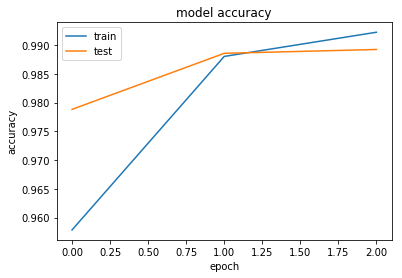

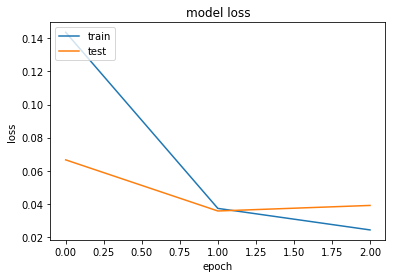

In [75]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss 
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()